In [1]:
import os
os.chdir('/data/l989o/deployed/a')
import sys
if '/data/l989o/a' in sys.path:
    sys.path.remove('/data/l989o/a')    

# Studing patients

## Computing fractions

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pickle
import pandas as pd
from data import file_path
from tqdm.notebook import tqdm

True
<KeysViewHDF5 ['count', 'maximum', 'mean', 'sum', 'variance']>


In [3]:
from data import TransformedMeanDataset
ds0 = TransformedMeanDataset('train')
n = 0
for x in ds0:
    n += len(x)
print(n)

ds1 = TransformedMeanDataset('validation')
v = 0
for x in ds1:
    v += len(x)
print(v)
print(n + v)

449434
220218
669652


In [4]:
class Quantities:
    def __init__(self):
        self.phenographs = dict()
        self.adata = dict()
        self.num_phenograph_classes = dict()
        self.all_fractions = dict()
        self.omes = dict()

q = Quantities()
        
for method in ['raw', 'transformed', 'vae_mu']:
    f = file_path(f'umap_{method}.adata')
    a = ad.read(f)
    print(a)
    a = a[:n].copy()
    print(a)

    index_info_omes, index_info_begins, index_info_ends = pickle.load(open(file_path('merged_cells_info.pickle'), 'rb'))
    print(index_info_ends[-1])

    l = []
    b = file_path(f'phenograph_{method}.hdf5')
    with h5py.File(b, 'r') as f:
        for i, o in enumerate(index_info_omes):
            phenograph = f[o]['phenograph'][...].reshape((-1, 1))
            assert len(phenograph) == index_info_ends[i] - index_info_begins[i]
            l.append(phenograph)
    phenographs = np.concatenate(l, axis=0)
    phenographs.shape
    q.phenographs[method] = phenographs

    s = pd.Series(phenographs.flatten(), dtype='category')
    print(s)
    s.index = a.obs.index

    a.obs['phenograph'] = s
    display(a.obs)
    q.adata[method] = a

    # sc.pl.umap(a, color='phenograph')

    num_phenograph_classes = np.max(phenographs) + 1
    q.num_phenograph_classes[method] = num_phenograph_classes
    print(num_phenograph_classes)
    a = len(set(phenographs.flatten().tolist()))
    assert num_phenograph_classes == a, a

    phenograph_fractions = dict()
    with h5py.File(b, 'r') as f:
        q.omes[method] = list(f.keys())
        for i, o in tqdm(enumerate(index_info_omes), desc='computing fractions'):
            phenograph = f[o]['phenograph'][...].reshape((-1, 1))
            assert len(phenograph) == index_info_ends[i] - index_info_begins[i]
            fractions = np.zeros((num_phenograph_classes))
            for p in phenograph.flatten():
                fractions[p] += 1
            fractions /= np.sum(fractions)
            phenograph_fractions[o] = fractions.reshape((1, -1))
    print(len(phenograph_fractions))
    all_fractions = np.concatenate(list(phenograph_fractions.values()), axis=0)
    print(all_fractions.shape)
    q.all_fractions[method] = all_fractions

AnnData object with n_obs × n_vars = 669652 × 39
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 449434 × 39
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
449434
0          6
1          3
2          3
3          1
4         22
          ..
449429    19
449430    12
449431     3
449432     2
449433    19
Length: 449434, dtype: category
Categories (58, int64): [0, 1, 2, 3, ..., 54, 55, 56, 57]


phenograph
0               6
1               3
2               3
3               1
4              22
...           ...
449429         19
449430         12
449431          3
449432          2
449433         19

[449434 rows x 1 columns]

58



226
(226, 58)
AnnData object with n_obs × n_vars = 669652 × 39
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 449434 × 39
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
449434
0         0
1         0
2         0
3         0
4         0
         ..
449429    1
449430    8
449431    3
449432    3
449433    1
Length: 449434, dtype: category
Categories (78, int64): [0, 1, 2, 3, ..., 74, 75, 76, 77]


phenograph
0               0
1               0
2               0
3               0
4               0
...           ...
449429          1
449430          8
449431          3
449432          3
449433          1

[449434 rows x 1 columns]

78



226
(226, 78)
AnnData object with n_obs × n_vars = 669652 × 5
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
AnnData object with n_obs × n_vars = 449434 × 5
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
449434
0         16
1         16
2         19
3         17
4          6
          ..
449429    12
449430     6
449431    22
449432    20
449433    11
Length: 449434, dtype: category
Categories (30, int64): [0, 1, 2, 3, ..., 26, 27, 28, 29]


phenograph
0              16
1              16
2              19
3              17
4               6
...           ...
449429         12
449430          6
449431         22
449432         20
449433         11

[449434 rows x 1 columns]

30



226
(226, 30)


In [5]:
q.fractions_u = dict()
q.dbscan_labels = dict()

for method in ['raw', 'transformed', 'vae_mu']:
    print('-' * 100)
    print('method =', method)
    from umap import UMAP
    reducer = UMAP(2, verbose=True)
    u = reducer.fit_transform(q.all_fractions[method])
    q.fractions_u[method] = u

    from sklearn.cluster import DBSCAN
    clustering = DBSCAN(eps=1, min_samples=2).fit(u)
    print(clustering.labels_)
    print(clustering)
    q.dbscan_labels[method] = clustering.labels_

    print(type(clustering.labels_))
    print(clustering.labels_.shape)

----------------------------------------------------------------------------------------------------
method = raw
UMAP(n_neighbors=2, verbose=True)
Construct fuzzy simplicial set
Thu Jan 28 23:23:05 2021 Finding Nearest Neighbors
Thu Jan 28 23:23:07 2021 Finished Nearest Neighbor Search
Thu Jan 28 23:23:08 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Jan 28 23:23:09 2021 Finished embedding
[ 0  1  2  3  4  4  5  6  7  8  4  9  4 10 11 12 13  1 14  4 15 10 16 17
  8 16 18 19  4  9 13 20 21 20 22 21  4 17 17 23 24 15 14 16 11 18 25  9
 11  4  4 24  3 15 26 16 27  9 28 29 30  1 28 30 26 23 10 18 28 18  0 18
  9 18 23 22 10 26 16  8  6  7 31 12 32  3 32  6 21 33 12 34 31  7 30 12
 33  6 32 17 14 31 31 35

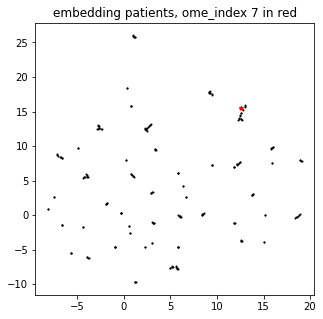

In [6]:
for method in ['vae_mu']:
    labels = q.dbscan_labels[method]
    u = q.fractions_u[method]
    plt.figure(figsize=(5, 5))
    colors = np.random.random((1000, 3))[labels]
    plt.scatter(u[:, 0], u[:, 1], c='k', s=1)
    plt.scatter(u[7, 0], u[7, 1], c='r', s=20, marker='*')
    ax = plt.gca()
    texts = list(map(str, labels))    
#     for i in range(len(u)):
#         ax.annotate(texts[i], (u[i, 0], u[i, 1]), color=colors[i])
    # plt.text(u[:, 0], u[:, 1], texts, color=colors)
    plt.title(f'embedding patients, ome_index 7 in red')
    plt.show()

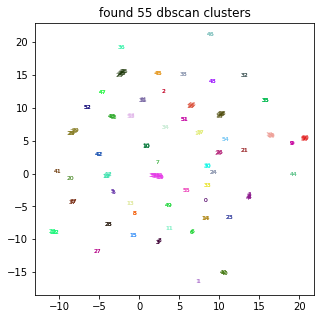

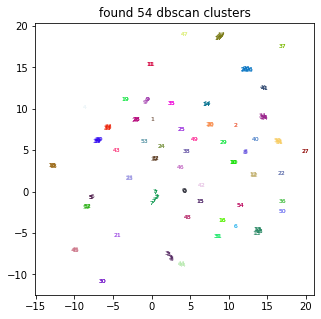

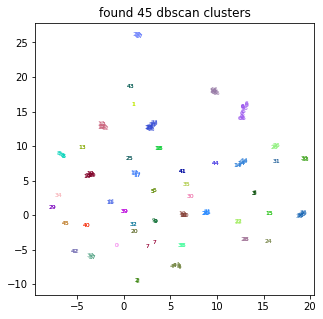

In [7]:
for method in ['raw', 'transformed', 'vae_mu']:
    labels = q.dbscan_labels[method]
    u = q.fractions_u[method]
    plt.figure(figsize=(5, 5))
    colors = np.random.random((1000, 3))[labels]
    plt.scatter(u[:, 0], u[:, 1], c=colors, alpha=0)
    ax = plt.gca()
    texts = list(map(str, labels))    
    for i in range(len(u)):
        ax.annotate(texts[i], (u[i, 0], u[i, 1]), color=colors[i], fontsize=6)
    # plt.text(u[:, 0], u[:, 1], texts, color=colors)
    plt.title(f'found {max(labels)} dbscan clusters')
    plt.show()

In [8]:
jitter = (np.random.rand(len(u)) - 0.5) / 25

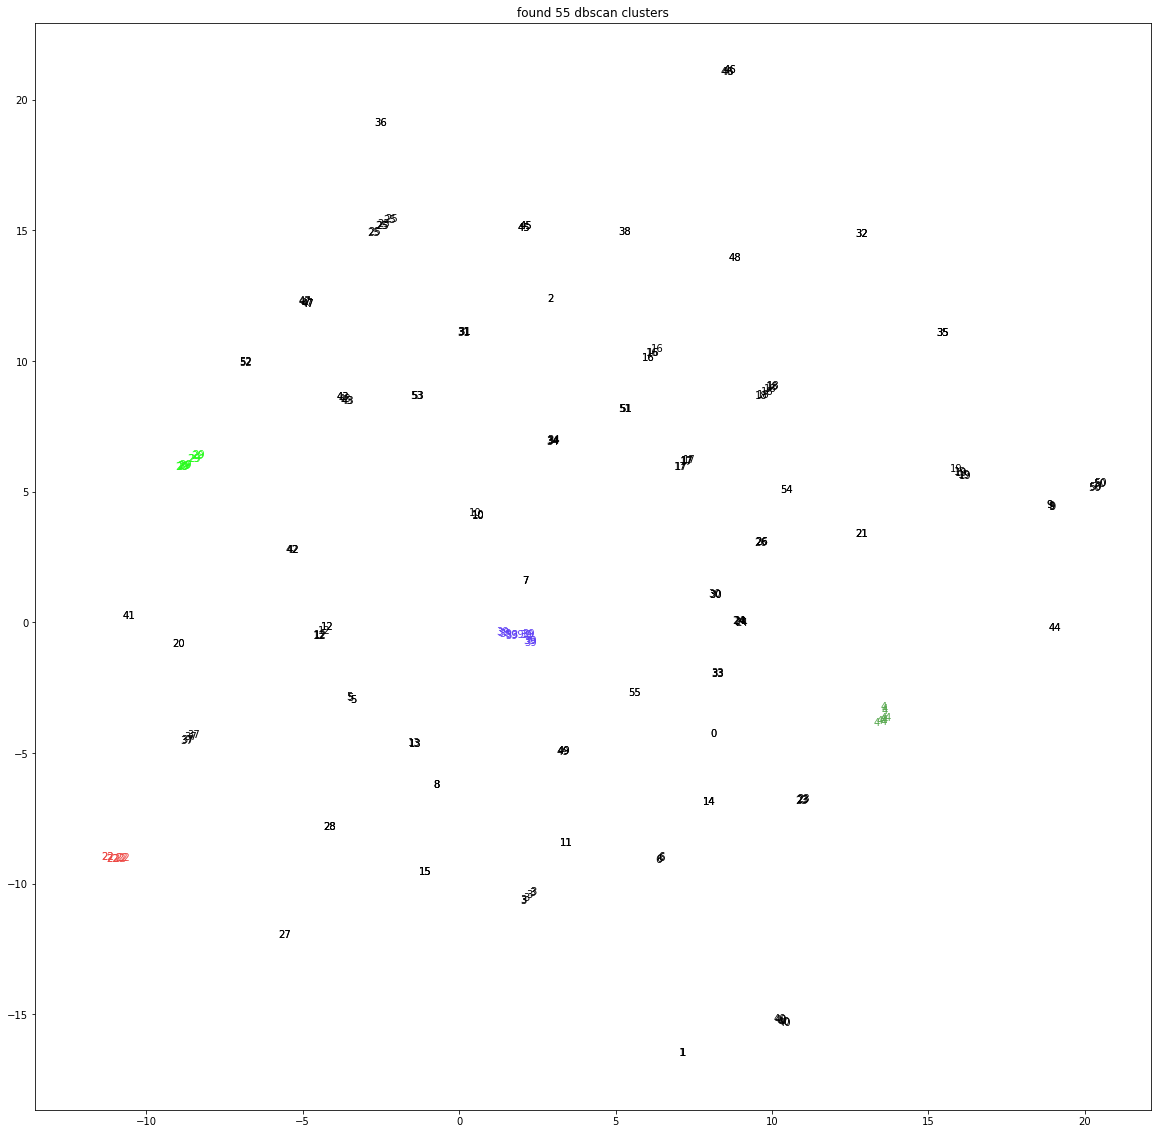

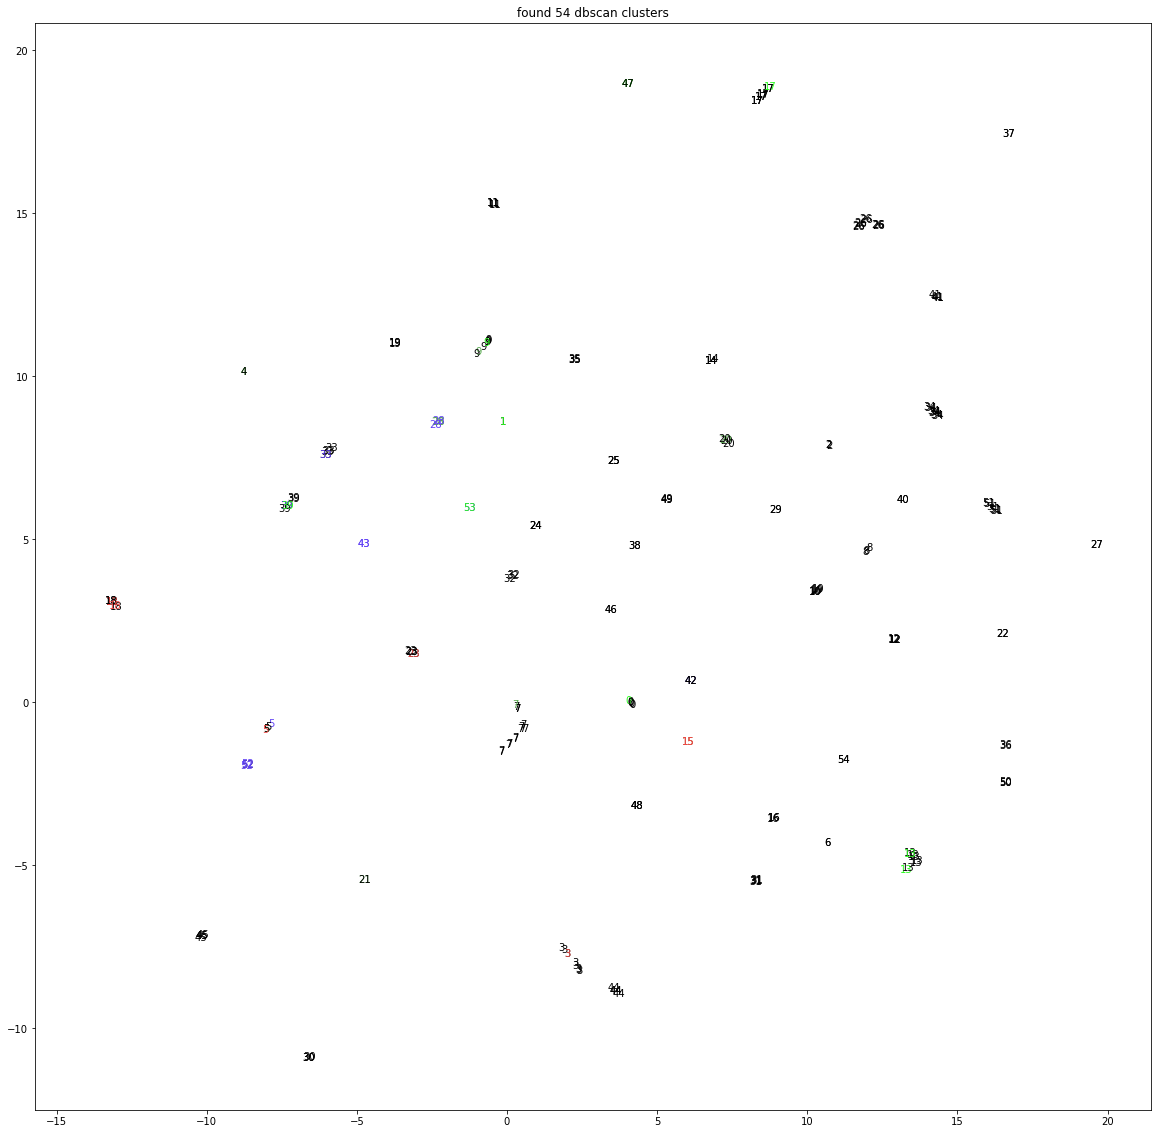

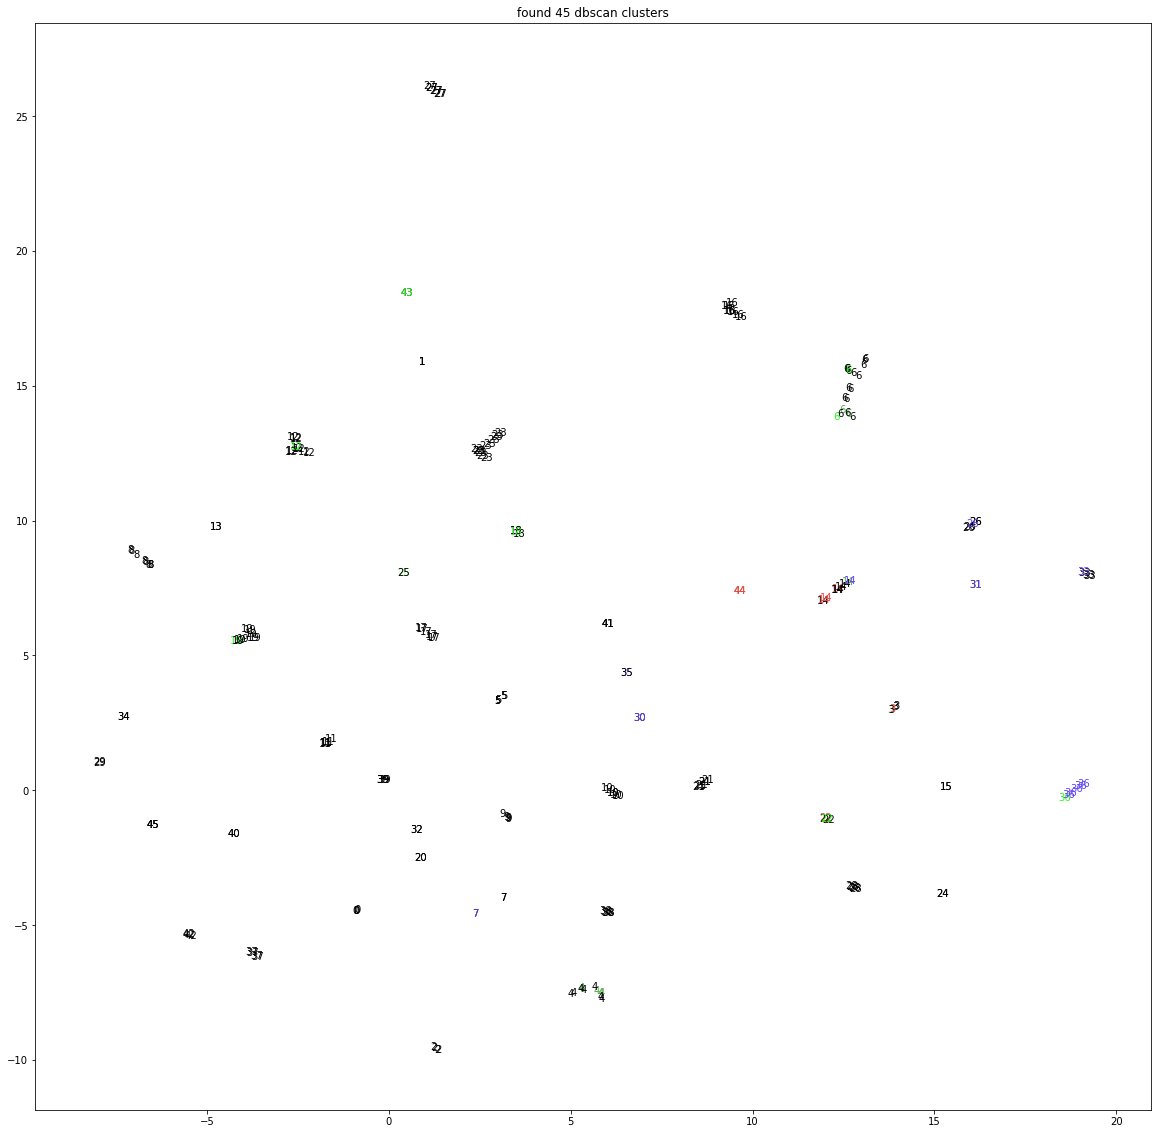

In [9]:
import numpy as np
random_colors = np.random.rand(4, 3)
hot_indices = [39, 4, 29, 22]
patients_per_hot_index = dict()
for h in hot_indices:
    l = np.where(q.dbscan_labels['raw'] == h)[0]
    patients_per_hot_index[h] = l

for method in ['raw', 'transformed', 'vae_mu']:
    labels = q.dbscan_labels[method]
    u = q.fractions_u[method]
    plt.figure(figsize=(20, 20))
    colors = np.tile([0., 0., 0.], (len(labels), 1))
    hot_indices = [39, 4, 29, 22]
    for color, index in zip(random_colors, hot_indices):
#         matches = np.where(labels == index)
#         print(len(matches[0]))
#         colors[matches, :] = color
        colors[patients_per_hot_index[index], :] = color
#     jitter = (np.random.rand(len(u)) - 0.5) / 25
    jitter_x = jitter * (np.max(u[:, 0]) - np.min(u[:, 0]))
    jitter_y = jitter * (np.max(u[:, 1]) - np.min(u[:, 1]))
    plt.scatter(u[:, 0] + jitter_x, u[:, 1] + jitter_y, c=colors, alpha=0)
    plt.scatter(u[:, 0], u[:, 1], c=colors, alpha=0)
    ax = plt.gca()
    texts = list(map(str, labels))    
    for i in range(len(u)):
        ax.annotate(texts[i], (u[i, 0], u[i, 1]), color=colors[i])
    # plt.text(u[:, 0], u[:, 1], texts, color=colors)
    plt.title(f'found {max(labels)} dbscan clusters')
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55]), array([ 2,  3,  2,  6, 10,  4,  4,  3,  3,  5,  4,  3,  6,  3,  4,  3,  5,
        6,  6,  5,  2,  3,  7,  4,  5,  7,  4,  2,  3,  9,  3,  4,  3,  3,
        4,  4,  2,  4,  2, 12,  4,  2,  3,  5,  2,  4,  4,  5,  2,  3,  4,
        4,  3,  3,  2,  2]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54]), array([ 5,  2,  3,  9,  3,  5,  2, 15,  3,  8,  5,  4,  4,  8,  4,  3,  3,
       10,  7,  3,  4,  2,  2,  5,  3,  3,  9,  2,  4,  2,  3,  4,  3,  5,
        7,  3,  2,  2,  2,  6,  2,  4,  3,  2,  4,  4,  2,  3,  3,  3,  3,
        6,  4, 

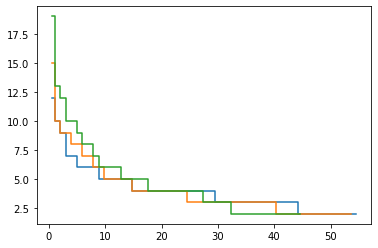

In [10]:
plt.figure()
methods = ['raw', 'transformed', 'vae_mu']
for method in methods:
    a = q.dbscan_labels[method]
    print(np.unique(a, return_counts=True))
    h, bin_edges = np.histogram(a, max(a) + 1)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    h = [-a for a in sorted(-h)]
    plt.step(bin_centers, h, where='mid')
#     s = sorted(bins)
#     plt.bar(mids, s)
plt.show()

## Matching BDSCAN clusters

----------------------------------------------------------------------------------------------------
score: 0.10572371543764972


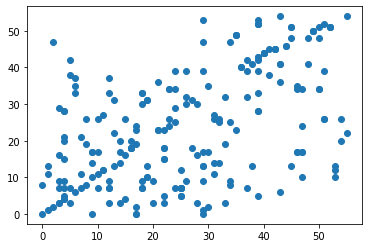

[(0, 39), (0, 39), (0, 39), (0, 39), (0, 39), (0, 39), (0, 39), (0, 39), (0, 39), (0, 39), (0, 39), (0, 39), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (1, 4), (2, 29), (2, 29), (2, 29), (2, 29), (2, 29), (2, 29), (2, 29), (2, 29), (2, 29), (3, 22), (3, 22), (3, 22), (3, 22), (3, 22), (3, 22), (3, 22), (4, 25), (4, 25), (4, 25), (4, 25), (4, 25), (4, 25), (4, 25), (5, 3), (5, 3), (5, 3), (5, 3), (5, 3), (5, 3), (6, 12), (6, 12), (6, 12), (6, 12), (6, 12), (6, 12), (7, 17), (7, 17), (7, 17), (7, 17), (7, 17), (7, 17), (8, 18), (8, 18), (8, 18), (8, 18), (8, 18), (8, 18), (9, 9), (9, 9), (9, 9), (9, 9), (9, 9), (10, 16), (10, 16), (10, 16), (10, 16), (10, 16), (11, 19), (11, 19), (11, 19), (11, 19), (11, 19), (12, 24), (12, 24), (12, 24), (12, 24), (12, 24), (13, 43), (13, 43), (13, 43), (13, 43), (13, 43), (14, 47), (14, 47), (14, 47), (14, 47), (14, 47), (15, 5), (15, 5), (15, 5), (15, 5), (16, 6), (16, 6), (16, 6), (16, 6), (17, 10), (17, 10), (17, 10), (1

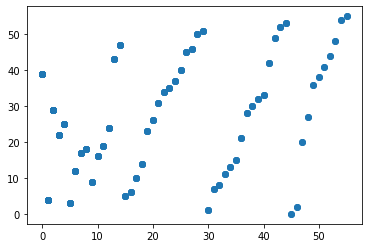

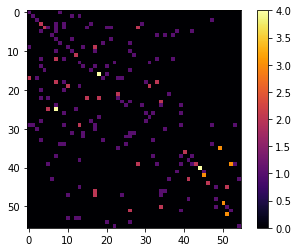

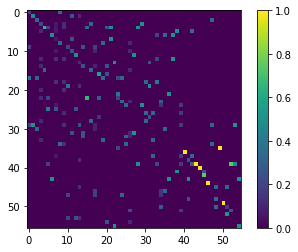

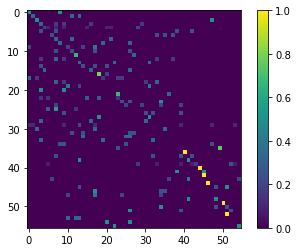

----------------------------------------------------------------------------------------------------
score: 0.170941342485445


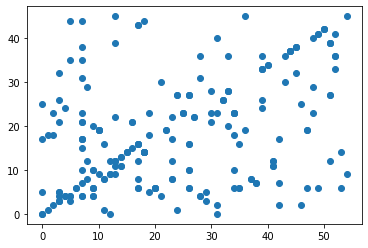

[(0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (0, 7), (1, 17), (1, 17), (1, 17), (1, 17), (1, 17), (1, 17), (1, 17), (1, 17), (1, 17), (1, 17), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (2, 3), (3, 26), (3, 26), (3, 26), (3, 26), (3, 26), (3, 26), (3, 26), (3, 26), (3, 26), (4, 9), (4, 9), (4, 9), (4, 9), (4, 9), (4, 9), (4, 9), (4, 9), (5, 13), (5, 13), (5, 13), (5, 13), (5, 13), (5, 13), (5, 13), (5, 13), (6, 18), (6, 18), (6, 18), (6, 18), (6, 18), (6, 18), (6, 18), (7, 34), (7, 34), (7, 34), (7, 34), (7, 34), (7, 34), (7, 34), (8, 39), (8, 39), (8, 39), (8, 39), (8, 39), (8, 39), (9, 51), (9, 51), (9, 51), (9, 51), (9, 51), (9, 51), (10, 0), (10, 0), (10, 0), (10, 0), (10, 0), (11, 5), (11, 5), (11, 5), (11, 5), (11, 5), (12, 10), (12, 10), (12, 10), (12, 10), (12, 10), (13, 23), (13, 23), (13, 23), (13, 23), (13, 23), (14, 33), (14, 33), (14, 33), (14, 33), (14, 33), (15, 11), (15, 11), (15, 1

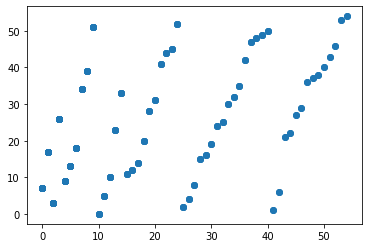

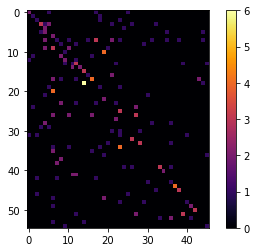

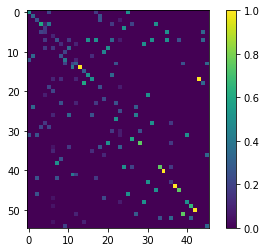

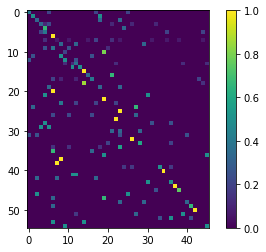

----------------------------------------------------------------------------------------------------
score: 0.09461828642206865


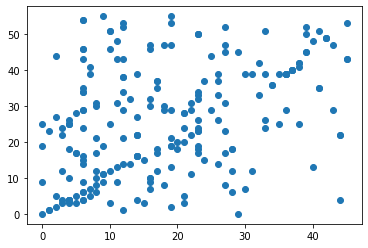

[(0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (0, 6), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (1, 23), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (2, 4), (3, 12), (3, 12), (3, 12), (3, 12), (3, 12), (3, 12), (3, 12), (3, 12), (3, 12), (3, 12), (4, 14), (4, 14), (4, 14), (4, 14), (4, 14), (4, 14), (4, 14), (4, 14), (4, 14), (4, 14), (5, 19), (5, 19), (5, 19), (5, 19), (5, 19), (5, 19), (5, 19), (5, 19), (5, 19), (6, 8), (6, 8), (6, 8), (6, 8), (6, 8), (6, 8), (6, 8), (6, 8), (7, 16), (7, 16), (7, 16), (7, 16), (7, 16), (7, 16), (7, 16), (7, 16), (8, 27), (8, 27), (8, 27), (8, 27), (8, 27), (8, 27), (8, 27), (9, 10), (9, 10), (9, 10), (9, 10), (9, 10), (9, 10), (10, 17), (10, 17), (10, 17), (10, 17), (10, 17), (10, 17), (11, 21), (11, 21), (11, 21), (11, 21), (11, 21), (11, 21), 

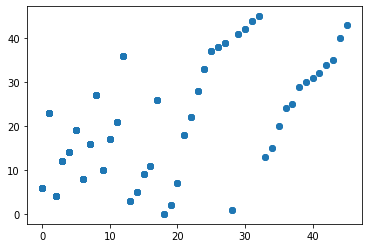

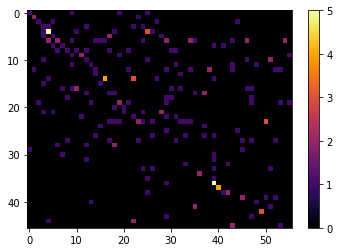

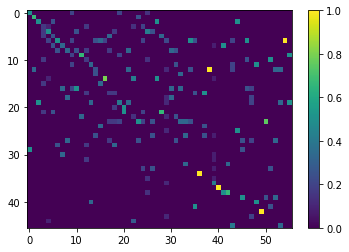

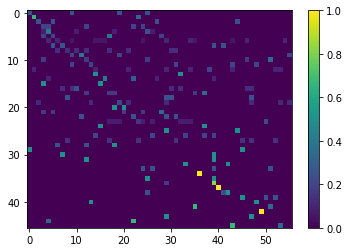

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [11]:
from sklearn.metrics import adjusted_rand_score
from operator import itemgetter

def get_m(method0, method1):
    print('-' * 100)
    n0 = max(q.dbscan_labels[method0]) + 1
    n1 = max(q.dbscan_labels[method1]) + 1    
    labels0 = q.dbscan_labels[method0]
    labels1 = q.dbscan_labels[method1]
    print('score:', adjusted_rand_score(labels0, labels1))
    plt.figure()
    plt.scatter(q.dbscan_labels[method0], q.dbscan_labels[method1])
    plt.show()
    
    counts0 = dict(zip(*np.unique(labels0, return_counts=True)))
    indices, sorted_labels0 = zip(*sorted(enumerate(labels0), key=lambda x: (-counts0[x[1]], x[1])))
#     print(sorted_labels0)
    
    seen = set()
    no_duplicates = [x for x in sorted_labels0 if not (x in seen or seen.add(x))]
    l = list(range(max(seen) + 1))
    assert len(l) == len(no_duplicates)
    my_map = zip(l, no_duplicates)
    relabeled0 = [no_duplicates.index(i) for i in sorted_labels0]
#     print(relabeled0)
    s = adjusted_rand_score(sorted_labels0, relabeled0)
    assert np.isclose(s, 1.), s
    
    sorted_labels1 = [labels1[i] for i in indices]
#     print(sorted_labels1)
    
    seen = set()
    no_duplicates = [x for x in sorted_labels1 if not (x in seen or seen.add(x))]
    l = list(range(max(seen) + 1))
    assert len(l) == len(no_duplicates)
    my_map = zip(l, no_duplicates)
    relabeled1 = [no_duplicates.index(i) for i in sorted_labels1]
#     print(relabeled0)
    s = adjusted_rand_score(sorted_labels1, relabeled1)
    assert np.isclose(s, 1.), s
#     counts1 = dict(zip(*np.unique(labels1, return_counts=True)))
#     sorted_labels1  = sorted(labels1, key=lambda x: (-counts1[x], x))
    
    plt.figure()
    print(list(zip(relabeled0, sorted_labels0)))
    print(list(zip(relabeled1, sorted_labels1)))
    plt.scatter(relabeled0, sorted_labels0)
    plt.show()
    
    m = np.zeros((n0, n1))
    for a, b in zip(labels0, labels1):
#     for a, b in zip(relabeled0, relabeled1):
        m[a, b] += 1
        
    m_rows = m.copy()
    m_cols = m.copy()
    m_rows = m_rows / np.sum(m_rows, axis=0, keepdims=True)
    m_cols = m_cols / np.sum(m_cols, axis=1, keepdims=True)
    
    plt.figure()
    plt.imshow(m, cmap='inferno')
    plt.colorbar()
    plt.show()
    
    plt.figure()
    plt.imshow(m_rows)
    plt.colorbar()
    plt.show()
    
    plt.figure()
    plt.imshow(m_cols)
    plt.colorbar()
    plt.show()
    return m

get_m('raw', 'transformed')
get_m('transformed', 'vae_mu')
get_m('vae_mu', 'raw')

# Metadata

## Coloring by cohort

In [12]:
from metadata import get_metadata
df = get_metadata()
display(df)
print(df['Subtype'].value_counts())

discarding 153 omes from the Basel cohort, remaining: 223
discarding 153 omes from the Zurich cohort, remaning: 229
clearing metadata
flattening PTNM_T labels
flattening PTNM_N labels
metadata cleaned


FileName_FullStack  merged_pid  \
2    BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20...         166   
3    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...         238   
4    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...         238   
6    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...          68   
7    BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20...          72   
..                                                 ...         ...   
350  ZTMA208_slide_13.25kx14.95ky_7000x7000_8_20171...         308   
354  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
355  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
356  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
357  ZTMA208_slide_20.73kx15.16ky_7000x7000_6_20171...         301   

    diseasestatus PrimarySite Subtype clinical_type  Height_FullStack  \
2           tumor      breast  PR-ER-     TripleNeg               723   
3           tumor      breast  PR+ER+      HR+HER2-               840   
4       non-tumor      breast  PR+ER+      HR+HER2-               765   
6           tumor      breast  PR+ER+      HR+HER2-               689   
7           tumor      breast  PR-ER+      HR+HER2-               716   
..            ...         ...     ...           ...               ...   
350         tumor      breast  PR+ER+           NaN               492   
354         tumor      breast  PR+ER+           NaN               503   
355         tumor      breast  PR+ER+           NaN               450   
356         tumor      breast  PR+ER+           NaN               464   
357         tumor      breast  PR+ER+           NaN               488   

     Width_FullStack    area  sum_area_cells  Count_Cells PTNM_T PTNM_N  \
2                749  541527          356411         3068     T2    pN0   
3                712  598080          286198         3173     T1    pN2   
4                689  527085          193119         2121     T1    pN2   
6                688  474032          218846         2262     T1    pN2   
7                737  527692          289717         2740     T1    pN0   
..               ...     ...             ...          ...    ...    ...   
350              514  252888          243839         3674     TX    pNX   
354              475  238925           98597         1256     T3    pN1   
355              541  243450          102638         1227     T3    pN1   
356              519  240816          123359         1580     T3    pN1   
357              540  263520          241444         3418     T3    pN1   

    PTNM_M  DFSmonth  OSmonth  images_per_patient  \
2       M0      35.0     37.0                   1   
3       M0     140.0    233.0                   2   
4       M0     140.0    233.0                   2   
6       M0     169.0    169.0                   2   
7      pM1     186.0    186.0                   2   
..     ...       ...      ...                 ...   
350    pM1       NaN      NaN                   6   
354    pM1       NaN      NaN                   6   
355    pM1       NaN      NaN                   6   
356    pM1       NaN      NaN                   6   
357    pM1       NaN      NaN                   6   

     images_per_patient_filtered  cohort  
2                              1   basel  
3                              2   basel  
4                              2   basel  
6                              1   basel  
7                              1   basel  
..                           ...     ...  
350                            4  zurich  
354                            4  zurich  
355                            4  zurich  
356                            4  zurich  
357                            4  zurich  

[452 rows x 19 columns]

PR+ER+    304
PR-ER-     68
PR-ER+     66
PR+ER-      9
Name: Subtype, dtype: int64


In [13]:
cohort_info = df.loc[df['FileName_FullStack'].isin(q.omes['raw']), 'cohort'].apply(lambda x: 0 if x == 'basel' else 1).to_numpy()
def f(x):
    assert type(x) == float and np.isnan(x) or x in ['PR+ER+', 'PR-ER-', 'PR-ER+', 'PR+ER-'], x
    if x == 'PR+ER+':
        return 0
    if x == 'PR-ER-':
        return 1
    if x == 'PR-ER+':
        return 2
    if x == 'PR+ER-':
        return 3
    if type(x) == float and np.isnan(x):
        return 4
    assert False
tumor_info = df.loc[df['FileName_FullStack'].isin(q.omes['raw']), 'Subtype'].apply(f).to_numpy()
print(cohort_info.shape)
print(tumor_info.shape)

(226,)
(226,)


12
10
9
7


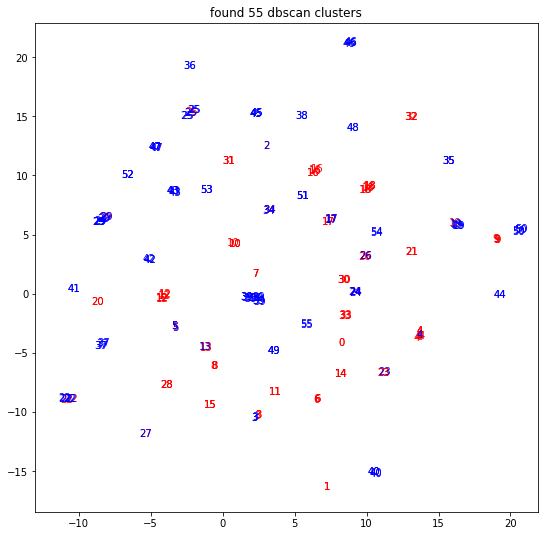

6
3
2
2


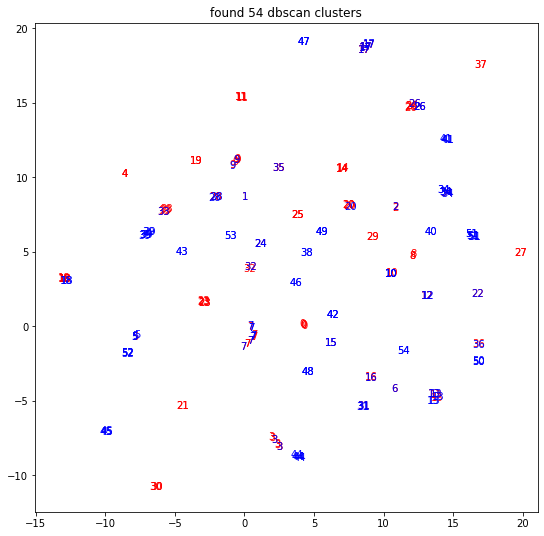

4
12
2
4


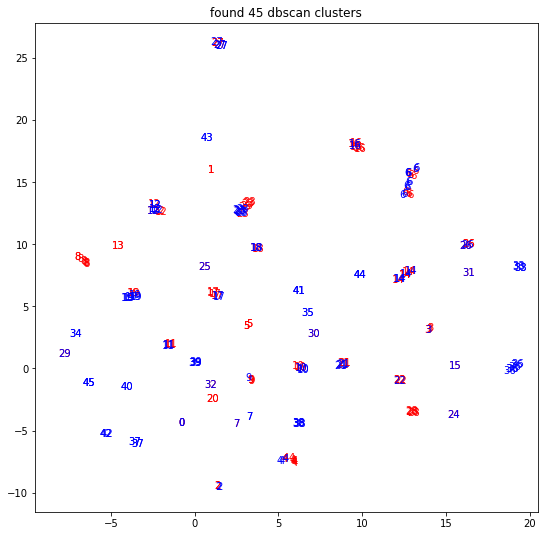

In [14]:
random_colors = np.random.rand(4, 3)

for method in ['raw', 'transformed', 'vae_mu']:
    labels = q.dbscan_labels[method]
    u = q.fractions_u[method]
    plt.figure(figsize=(9, 9))
    colors = np.tile([0., 0., 0.], (len(labels), 1))
    two_colors = np.array([[1., 0., 0.], [0., 0., 1.]])
    hot_indices = [39, 4, 29, 22]
    for color, index in zip(random_colors, hot_indices):
        matches = np.where(labels == index)
        print(len(matches[0]))
        colors[matches, :] = color
    plt.scatter(u[:, 0], u[:, 1], c=cohort_info, alpha=0)
    ax = plt.gca()
    texts = list(map(str, labels))    
    cohort_colors = two_colors[cohort_info, :]
    for i in range(len(u)):
        ax.annotate(texts[i], (u[i, 0], u[i, 1]), color=cohort_colors[i, :])
    # plt.text(u[:, 0], u[:, 1], texts, color=colors)
    plt.title(f'found {max(labels)} dbscan clusters')
    plt.show()

## Coloring by cancer type

12
10
9
7


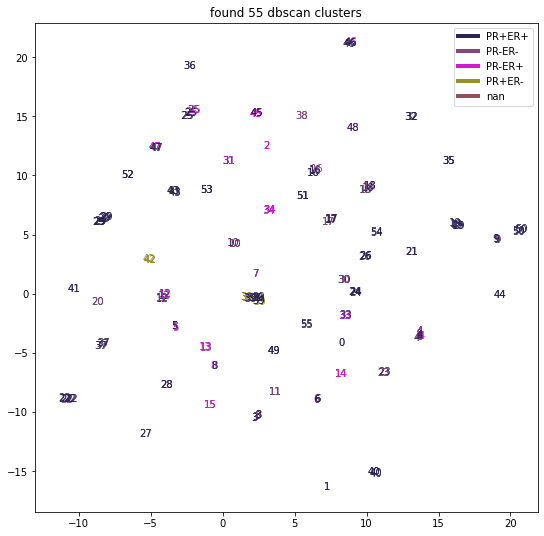

6
3
2
2


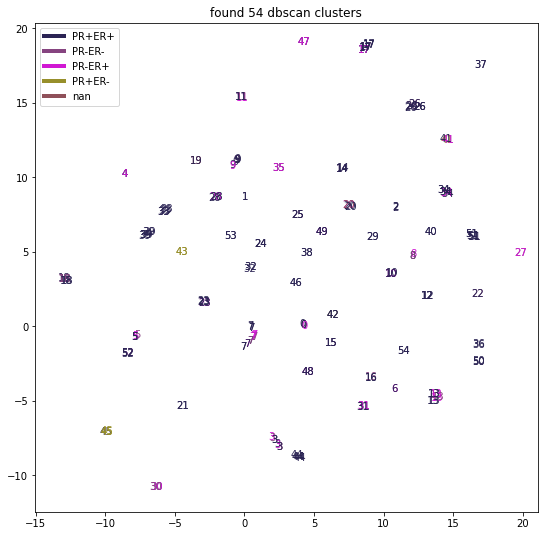

4
12
2
4


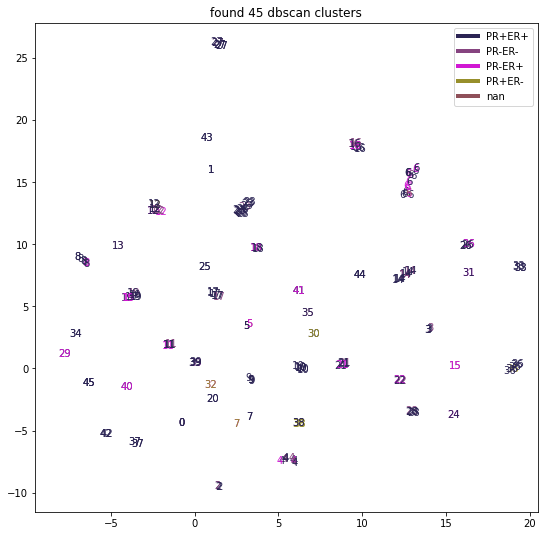

In [15]:
random_colors = np.random.rand(5, 3)

for method in ['raw', 'transformed', 'vae_mu']:
    labels = q.dbscan_labels[method]
    u = q.fractions_u[method]
    plt.figure(figsize=(9, 9))
    colors = np.tile([0., 0., 0.], (len(labels), 1))
    hot_indices = [39, 4, 29, 22]
    for color, index in zip(random_colors, hot_indices):
        matches = np.where(labels == index)
        print(len(matches[0]))
        colors[matches, :] = color
    plt.scatter(u[:, 0], u[:, 1], alpha=0)
    ax = plt.gca()
    texts = list(map(str, labels))    
    cohort_colors = random_colors[tumor_info, :]
    for i in range(len(u)):
        ax.annotate(texts[i], (u[i, 0], u[i, 1]), color=cohort_colors[i, :])
    # plt.text(u[:, 0], u[:, 1], texts, color=colors)
    plt.title(f'found {max(labels)} dbscan clusters')
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=random_colors[i], lw=4) for i in range(5)]
    ax.legend(custom_lines, ['PR+ER+', 'PR-ER-', 'PR-ER+', 'PR+ER-', 'nan'])
    plt.show()

## Coloring by patient

In [16]:
df

FileName_FullStack  merged_pid  \
2    BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20...         166   
3    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...         238   
4    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...         238   
6    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...          68   
7    BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20...          72   
..                                                 ...         ...   
350  ZTMA208_slide_13.25kx14.95ky_7000x7000_8_20171...         308   
354  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
355  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
356  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
357  ZTMA208_slide_20.73kx15.16ky_7000x7000_6_20171...         301   

    diseasestatus PrimarySite Subtype clinical_type  Height_FullStack  \
2           tumor      breast  PR-ER-     TripleNeg               723   
3           tumor      breast  PR+ER+      HR+HER2-               840   
4       non-tumor      breast  PR+ER+      HR+HER2-               765   
6           tumor      breast  PR+ER+      HR+HER2-               689   
7           tumor      breast  PR-ER+      HR+HER2-               716   
..            ...         ...     ...           ...               ...   
350         tumor      breast  PR+ER+           NaN               492   
354         tumor      breast  PR+ER+           NaN               503   
355         tumor      breast  PR+ER+           NaN               450   
356         tumor      breast  PR+ER+           NaN               464   
357         tumor      breast  PR+ER+           NaN               488   

     Width_FullStack    area  sum_area_cells  Count_Cells PTNM_T PTNM_N  \
2                749  541527          356411         3068     T2    pN0   
3                712  598080          286198         3173     T1    pN2   
4                689  527085          193119         2121     T1    pN2   
6                688  474032          218846         2262     T1    pN2   
7                737  527692          289717         2740     T1    pN0   
..               ...     ...             ...          ...    ...    ...   
350              514  252888          243839         3674     TX    pNX   
354              475  238925           98597         1256     T3    pN1   
355              541  243450          102638         1227     T3    pN1   
356              519  240816          123359         1580     T3    pN1   
357              540  263520          241444         3418     T3    pN1   

    PTNM_M  DFSmonth  OSmonth  images_per_patient  \
2       M0      35.0     37.0                   1   
3       M0     140.0    233.0                   2   
4       M0     140.0    233.0                   2   
6       M0     169.0    169.0                   2   
7      pM1     186.0    186.0                   2   
..     ...       ...      ...                 ...   
350    pM1       NaN      NaN                   6   
354    pM1       NaN      NaN                   6   
355    pM1       NaN      NaN                   6   
356    pM1       NaN      NaN                   6   
357    pM1       NaN      NaN                   6   

     images_per_patient_filtered  cohort  
2                              1   basel  
3                              2   basel  
4                              2   basel  
6                              1   basel  
7                              1   basel  
..                           ...     ...  
350                            4  zurich  
354                            4  zurich  
355                            4  zurich  
356                            4  zurich  
357                            4  zurich  

[452 rows x 19 columns]

In [17]:
patient_of_origin = df.loc[df['FileName_FullStack'].isin(q.omes['raw']), 'merged_pid'].to_numpy()
patient_of_origin

array([166, 238, 238, 206, 206, 280, 220,  24,  24, 284, 100, 177, 282,
        45, 211, 239, 227, 234,  33,  39,  61,  44, 159,  38, 114, 268,
       256,  55,  60,  40,  14,   2, 112, 129, 203, 101,  41, 255, 249,
       215,  36,  84, 105,   6,  51, 120, 253, 253, 251, 217,  70,  10,
       264,  54, 188,  74, 192, 189, 154, 183, 130, 109, 174, 232, 148,
        81, 279, 229, 258,   5, 223,  73, 182, 198, 164, 121,  12, 162,
        87,   1, 233, 243, 278, 278,  34, 144, 180, 260, 260, 119, 201,
        67,  75,  23, 272, 200, 242, 207,  26, 140, 195, 252, 213,  95,
        19, 170, 209,  50,  77, 110, 291, 297, 297, 297, 297, 343, 343,
       344, 344, 344, 344, 335, 335, 335, 340, 340, 340, 340, 340, 357,
       357, 357, 357, 311, 311, 311, 311, 293, 293, 293, 309, 309, 309,
       309, 309, 338, 338, 338, 338, 348, 348, 290, 290, 290, 290, 303,
       303, 303, 303, 313, 313, 313, 339, 339, 339, 339, 322, 322, 322,
       286, 286, 287, 287, 287, 326, 326, 326, 315, 337, 337, 33

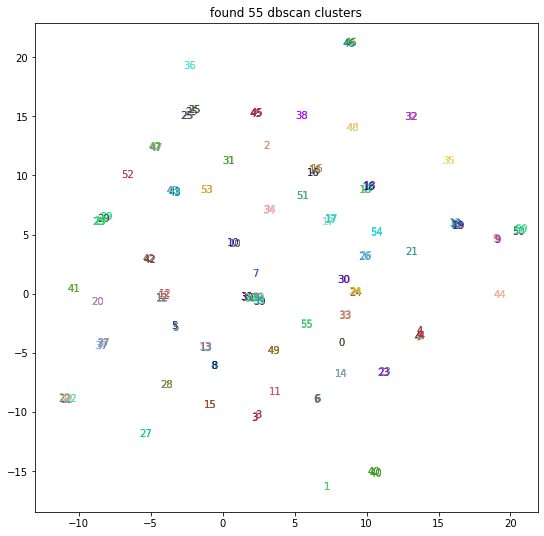

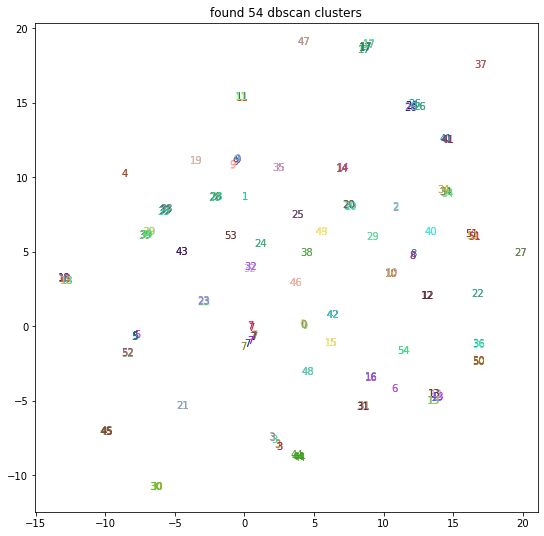

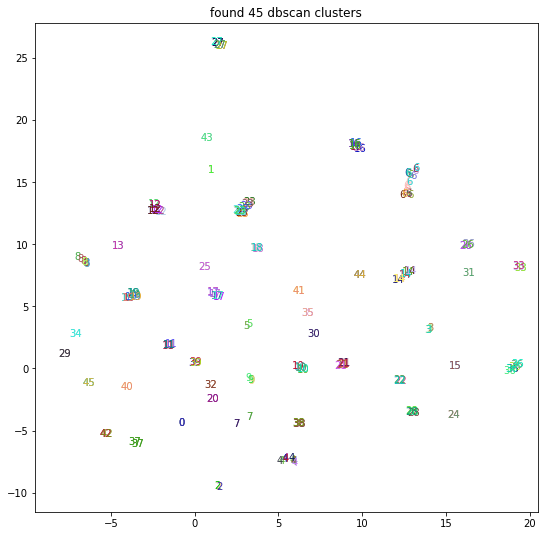

In [18]:
random_colors = np.random.rand(1000, 3)

for method in ['raw', 'transformed', 'vae_mu']:
    labels = q.dbscan_labels[method]
    u = q.fractions_u[method]
    plt.figure(figsize=(9, 9))
    plt.scatter(u[:, 0], u[:, 1], alpha=0)
    ax = plt.gca()
    texts = list(map(str, labels))    
    cohort_colors = random_colors[patient_of_origin, :]
    for i in range(len(u)):
        ax.annotate(texts[i], (u[i, 0], u[i, 1]), color=cohort_colors[i, :])
    # plt.text(u[:, 0], u[:, 1], texts, color=colors)
    plt.title(f'found {max(labels)} dbscan clusters')
    plt.show()

----------------------------------------------------------------------------------------------------
score: 0.092772546107969


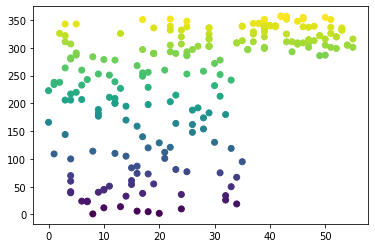

(120, 121, 122, 123, 145, 179, 188, 189, 212, 218, 219, 224, 4, 5, 10, 12, 19, 28, 36, 49, 50, 182, 59, 155, 156, 157, 199, 200, 202, 214, 215, 34, 75, 139, 163, 193, 207, 208, 46, 108, 137, 148, 149, 170, 171, 3, 52, 85, 116, 135, 166, 15, 83, 90, 95, 106, 109, 23, 37, 38, 99, 112, 220, 26, 45, 67, 69, 71, 73, 11, 29, 47, 57, 72, 22, 25, 43, 55, 78, 27, 151, 152, 153, 203, 40, 51, 181, 186, 209, 132, 134, 195, 196, 198, 144, 159, 177, 178, 225, 6, 110, 115, 172, 7, 80, 87, 97, 13, 21, 66, 76, 18, 42, 100, 105, 39, 65, 74, 154, 54, 64, 77, 111, 82, 92, 101, 102, 91, 104, 140, 141, 103, 160, 164, 165, 117, 133, 197, 213, 124, 125, 126, 127, 142, 150, 183, 184, 143, 147, 191, 194, 173, 192, 204, 216, 176, 180, 221, 222, 1, 17, 61, 8, 81, 93, 9, 24, 79, 14, 44, 48, 16, 30, 175, 20, 41, 53, 32, 35, 88, 58, 62, 68, 60, 63, 94, 84, 86, 98, 89, 96, 107, 129, 130, 131, 167, 168, 169, 185, 187, 190, 201, 210, 211, 0, 70, 2, 174, 31, 33, 56, 158, 113, 114, 118, 119, 128, 146, 136, 138, 161, 162,

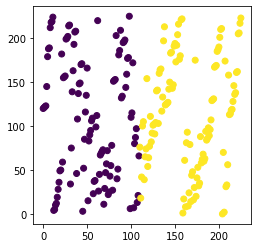

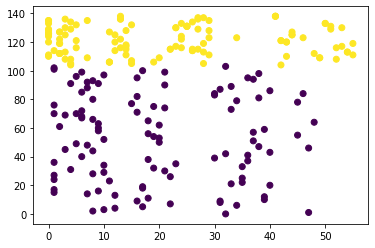

In [19]:
from sklearn.metrics import adjusted_rand_score
from operator import itemgetter

def get_m_patients(method0):
    print('-' * 100)
    n0 = max(q.dbscan_labels[method0]) + 1
    labels0 = q.dbscan_labels[method0]
    print('score:', adjusted_rand_score(labels0, patient_of_origin))
    plt.figure()
    plt.scatter(q.dbscan_labels[method0], patient_of_origin, c=patient_of_origin)
    plt.show()
    
    counts0 = dict(zip(*np.unique(labels0, return_counts=True)))
    indices, sorted_labels0 = zip(*sorted(enumerate(labels0), key=lambda x: (-counts0[x[1]], x[1])))
#     print(sorted_labels0)
    
    seen = set()
    no_duplicates = [x for x in sorted_labels0 if not (x in seen or seen.add(x))]
    l = list(range(max(seen) + 1))
    assert len(l) == len(no_duplicates)
    my_map = zip(l, no_duplicates)
    relabeled0 = [no_duplicates.index(i) for i in sorted_labels0]
#     print(relabeled0)
    s = adjusted_rand_score(sorted_labels0, relabeled0)
    assert np.isclose(s, 1.), s
    
#     print(labels0)
#     print(sorted_labels0)
#     print(relabeled0)
    print(indices)
    plt.figure()
    plt.scatter(np.arange(len(indices)), indices, c=cohort_info)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.show()
    sorted_patient_of_origin = [patient_of_origin[i] for i in indices]

    make_indices_adjacent = dict(zip(sorted(list(set(sorted_patient_of_origin))), list(range(len(set(sorted_patient_of_origin))))))
    
    plt.figure()
    plt.scatter(relabeled0, [make_indices_adjacent[s] for s in sorted_patient_of_origin], c=[cohort_info[i] for i in indices])
    plt.show()
    return

    m = np.zeros((n0, len(make_indices_adjacent)))
    for a, b in zip(relabeled0, sorted_patient_of_origin):
#     for a, b in zip(relabeled0, relabeled1):
        m[a, make_indices_adjacent[b]] += 1
        
    m_rows = m.copy()
    m_cols = m.copy()
    m_rows = m_rows / np.sum(m_rows, axis=0, keepdims=True)
    m_cols = m_cols / np.sum(m_cols, axis=1, keepdims=True)

    plt.figure(figsize=(20, 9))
    plt.imshow(m, cmap='inferno')
    plt.colorbar()
    plt.show()
    
    plt.figure(figsize=(20, 9))
    plt.imshow(m_rows)
    plt.colorbar()
    plt.show()
    
    plt.figure(figsize=(20, 9))
    plt.imshow(m_cols)
    plt.colorbar()
    plt.show()
    return m

get_m_patients('raw')
# get_m_patients('transformed')
# get_m_patients('vae_mu')

----------------------------------------------------------------------------------------------------
score: 0.092772546107969


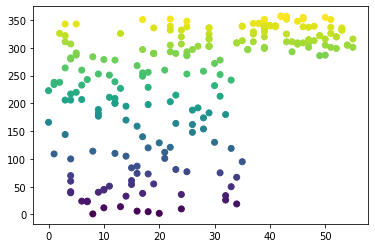

226
226
226
139
226


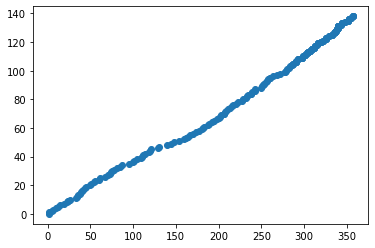

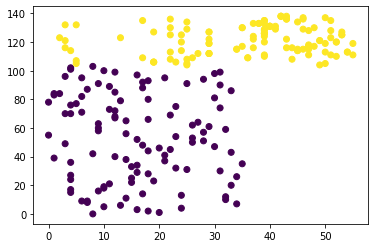

226
226


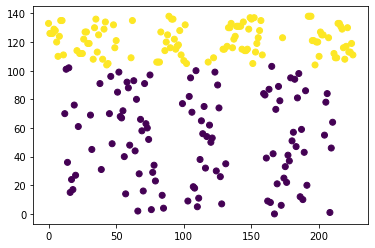

In [20]:
from sklearn.metrics import adjusted_rand_score
from operator import itemgetter

method0 = 'raw'
print('-' * 100)
n0 = max(q.dbscan_labels[method0]) + 1
labels0 = q.dbscan_labels[method0]
print('score:', adjusted_rand_score(labels0, patient_of_origin))
plt.figure()
plt.scatter(q.dbscan_labels[method0], patient_of_origin, c=patient_of_origin)
plt.show()

counts0 = dict(zip(*np.unique(labels0, return_counts=True)))
indices, sorted_labels0 = zip(*sorted(enumerate(labels0), key=lambda x: (-counts0[x[1]], x[1])))
print(len(sorted_labels0))
print(len(cohort_info))
print(len(patient_of_origin))
make_indices_adjacent = dict(zip(sorted(list(set(patient_of_origin))), list(range(len(set(patient_of_origin))))))
print(len(make_indices_adjacent))
patient_of_origin_adjacent = [make_indices_adjacent[p] for p in patient_of_origin]
print(len(patient_of_origin_adjacent))
plt.figure()
plt.scatter(patient_of_origin, patient_of_origin_adjacent)
plt.show()

plt.figure()
plt.scatter(q.dbscan_labels[method0], patient_of_origin_adjacent, c=cohort_info)
plt.show()

sorted_patient_of_origin_adjacent = [patient_of_origin_adjacent[i] for i in indices]
sorted_cohort_info = [cohort_info[i] for i in indices]
print(len(sorted_patient_of_origin_adjacent))
print(len(sorted_cohort_info))
plt.figure()
plt.scatter(np.arange(len(sorted_patient_of_origin_adjacent)), sorted_patient_of_origin_adjacent, c=sorted_cohort_info)
plt.show()

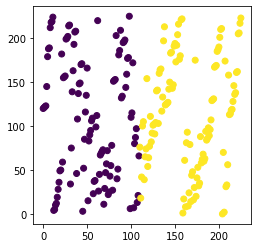

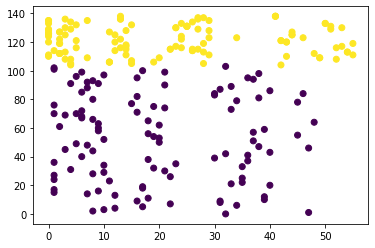

In [21]:
seen = set()
no_duplicates = [x for x in sorted_labels0 if not (x in seen or seen.add(x))]
l = list(range(max(seen) + 1))
assert len(l) == len(no_duplicates)
my_map = zip(l, no_duplicates)
relabeled0 = [no_duplicates.index(i) for i in sorted_labels0]
#     print(relabeled0)
s = adjusted_rand_score(sorted_labels0, relabeled0)
assert np.isclose(s, 1.), s

#     print(labels0)
#     print(sorted_labels0)
#     print(relabeled0)

plt.figure()
plt.scatter(np.arange(len(indices)), indices, c=cohort_info)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

plt.figure()
plt.scatter(relabeled0, sorted_patient_of_origin_adjacent, c=sorted_cohort_info)
plt.show()

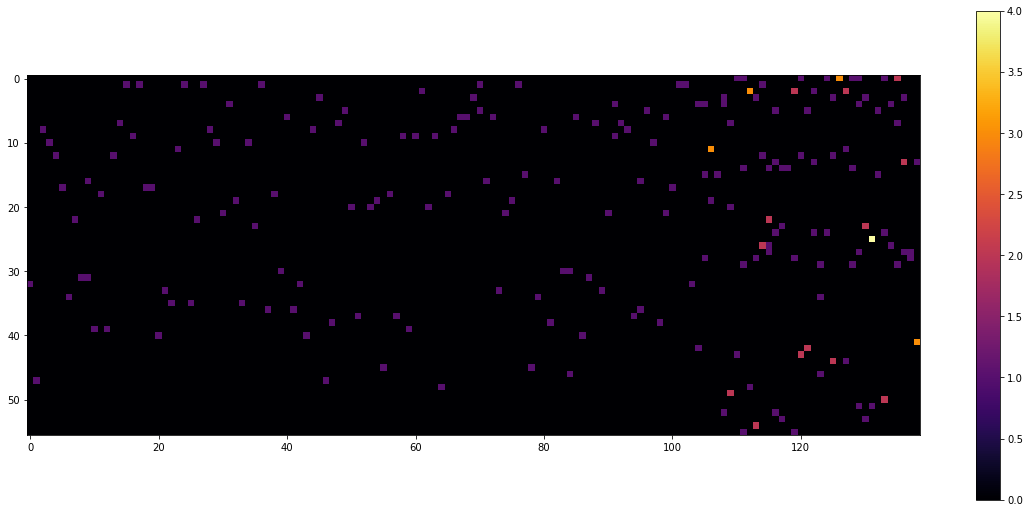

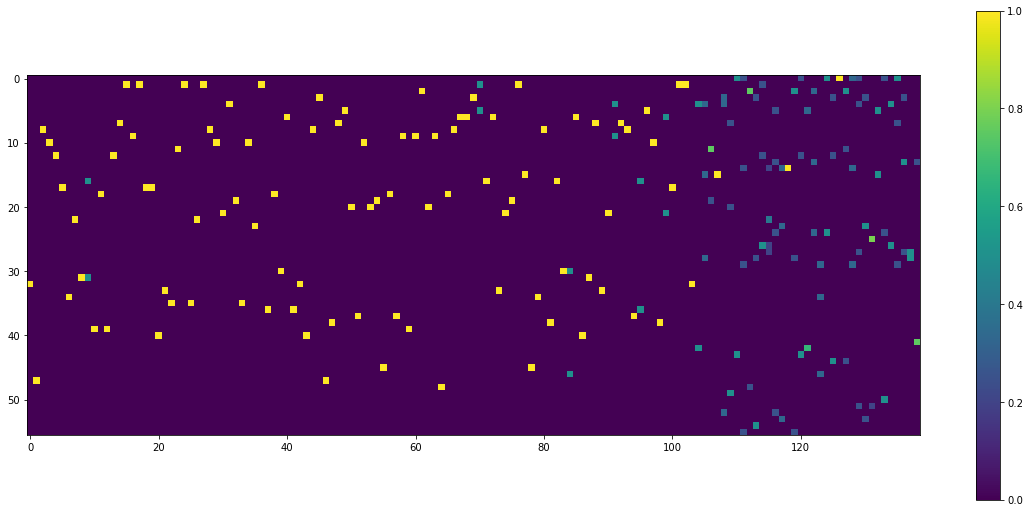

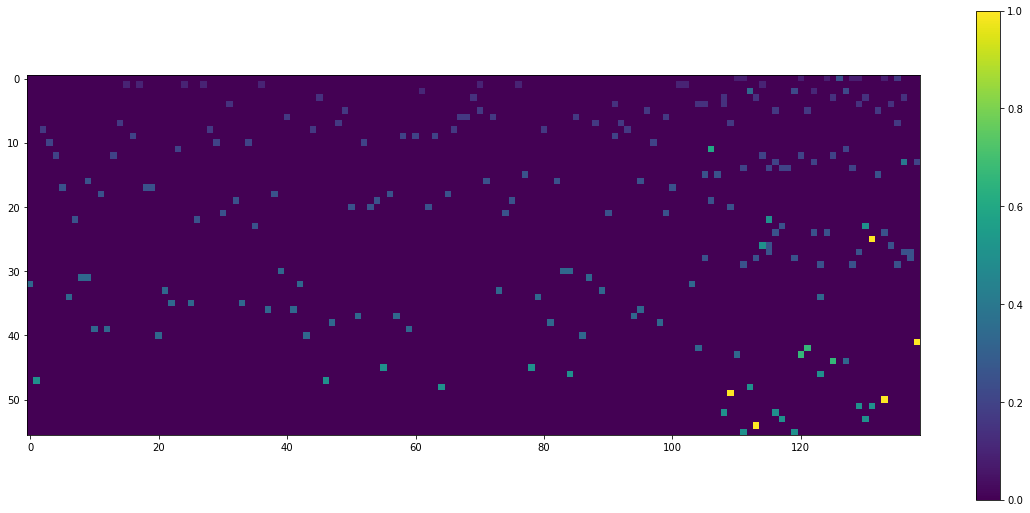

In [22]:
m = np.zeros((n0, len(make_indices_adjacent)))
for a, b in zip(relabeled0, sorted_patient_of_origin_adjacent):
#     for a, b in zip(relabeled0, relabeled1):
    m[a, b] += 1

m_rows = m.copy()
m_cols = m.copy()
m_rows = m_rows / np.sum(m_rows, axis=0, keepdims=True)
m_cols = m_cols / np.sum(m_cols, axis=1, keepdims=True)

plt.figure(figsize=(20, 9))
plt.imshow(m, cmap='inferno')
plt.colorbar()
plt.show()

plt.figure(figsize=(20, 9))
plt.imshow(m_rows)
plt.colorbar()
plt.show()

plt.figure(figsize=(20, 9))
plt.imshow(m_cols)
plt.colorbar()
plt.show()

## Looking at the DBSCAN clusters that are more numerous in raw data

In [23]:
df

FileName_FullStack  merged_pid  \
2    BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20...         166   
3    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...         238   
4    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...         238   
6    BaselTMA_SP41_25.475kx12.665ky_8000x8500_3_201...          68   
7    BaselTMA_SP41_15.475kx12.665ky_10000x8500_5_20...          72   
..                                                 ...         ...   
350  ZTMA208_slide_13.25kx14.95ky_7000x7000_8_20171...         308   
354  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
355  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
356  ZTMA208_slide_28.23kx22.4ky_7000x7000_5_201711...         301   
357  ZTMA208_slide_20.73kx15.16ky_7000x7000_6_20171...         301   

    diseasestatus PrimarySite Subtype clinical_type  Height_FullStack  \
2           tumor      breast  PR-ER-     TripleNeg               723   
3           tumor      breast  PR+ER+      HR+HER2-               840   
4       non-tumor      breast  PR+ER+      HR+HER2-               765   
6           tumor      breast  PR+ER+      HR+HER2-               689   
7           tumor      breast  PR-ER+      HR+HER2-               716   
..            ...         ...     ...           ...               ...   
350         tumor      breast  PR+ER+           NaN               492   
354         tumor      breast  PR+ER+           NaN               503   
355         tumor      breast  PR+ER+           NaN               450   
356         tumor      breast  PR+ER+           NaN               464   
357         tumor      breast  PR+ER+           NaN               488   

     Width_FullStack    area  sum_area_cells  Count_Cells PTNM_T PTNM_N  \
2                749  541527          356411         3068     T2    pN0   
3                712  598080          286198         3173     T1    pN2   
4                689  527085          193119         2121     T1    pN2   
6                688  474032          218846         2262     T1    pN2   
7                737  527692          289717         2740     T1    pN0   
..               ...     ...             ...          ...    ...    ...   
350              514  252888          243839         3674     TX    pNX   
354              475  238925           98597         1256     T3    pN1   
355              541  243450          102638         1227     T3    pN1   
356              519  240816          123359         1580     T3    pN1   
357              540  263520          241444         3418     T3    pN1   

    PTNM_M  DFSmonth  OSmonth  images_per_patient  \
2       M0      35.0     37.0                   1   
3       M0     140.0    233.0                   2   
4       M0     140.0    233.0                   2   
6       M0     169.0    169.0                   2   
7      pM1     186.0    186.0                   2   
..     ...       ...      ...                 ...   
350    pM1       NaN      NaN                   6   
354    pM1       NaN      NaN                   6   
355    pM1       NaN      NaN                   6   
356    pM1       NaN      NaN                   6   
357    pM1       NaN      NaN                   6   

     images_per_patient_filtered  cohort  
2                              1   basel  
3                              2   basel  
4                              2   basel  
6                              1   basel  
7                              1   basel  
..                           ...     ...  
350                            4  zurich  
354                            4  zurich  
355                            4  zurich  
356                            4  zurich  
357                            4  zurich  

[452 rows x 19 columns]

In [24]:
import torch

def get_filtered_labels_mapping(ome_index, ome_filename, split):
    import pickle
    f = os.path.join('data/spatial_uzh_processed/a', f'ok_cells_{split}.npy')
    d = pickle.load(open(f, 'rb'))
    list_of_cells = d['list_of_cells']
    list_of_ome_filenames = d['list_of_ome_filenames']
    list_of_ome_indices = d['list_of_ome_indices']
    list_of_cell_ids = d['list_of_cell_ids']
    cell_is_ok = d['cell_is_ok']
    begin = list_of_ome_filenames.index(ome_filename)
    end = len(list_of_ome_filenames) - list_of_ome_filenames[::-1].index(ome_filename)
    # print(list_of_ome_filenames[begin])
    # print(list_of_ome_filenames[end - 1])
    # print(list_of_ome_filenames[end])
    # print(list_of_ome_filenames[end + 1])
    oks = cell_is_ok[begin: end]
    # labels = list_of_cell_ids[begin: end]
    # print(oks.shape)
    # print(t.shape)
    l0 = np.array(list(range(np.sum(oks).item())))
    l1 = list_of_cell_ids[ome_index][oks]
    assert len(l0) == len(l1)
    d = dict(zip(l0, l1))
    return d

In [25]:
# STEP 1: get all the expression values
from data import RawMeanDataset, TransformedMeanDataset, MasksDataset
index_info_omes, index_info_begins, index_info_ends = pickle.load(open(file_path('merged_cells_info.pickle'), 'rb'))

expressions = dict()
for method in methods:
    if method == 'raw':
        ds = RawMeanDataset('train')
        l = []
        for x in tqdm(ds, 'merging raw expresions'):
            l.append(x.numpy())
        expressions[method] = np.concatenate(l, axis=0)
    elif method == 'transformed':
        ds = TransformedMeanDataset('train')
        l = []
        for x in tqdm(ds, 'merging transformed expresions'):
            l.append(x.numpy())
        expressions[method] = np.concatenate(l, axis=0)
    elif method == 'vae_mu':
        f = os.path.join(file_path('vae_transformed_mean_dataset_LR_VB_S_0.0014685885989200848__3.8608662714605464e-08__False'), 'embedding_train.hdf5')
        with h5py.File(f, 'r') as f5:
            assert len(f5.keys()) == 1
            k, v = f5.items().__iter__().__next__()
            raw_ds = RawMeanDataset('train')
            o_train = raw_ds.filenames                
            original_list = []
            mu_list = []
            log_var_list = []
            for i, o in enumerate(tqdm(o_train, desc='accessing latent space')):
                original = raw_ds[i].clone().detach().numpy()
                mu = v[o]['mu'][...]
                log_var = v[o]['log_var'][...]
                assert mu.shape == log_var.shape
                assert len(original) == len(mu)
                original_list.append(original)
                mu_list.append(mu)
                log_var_list.append(log_var)
            expressions[method] = np.concatenate(mu_list, axis=0)
    else:
        raise ValueError()
        

In [26]:
# STEP 2: compute the PCA, affine transform into [0, 1]
from sklearn.decomposition import PCA
pca = dict()
for method in methods:
    reducer = PCA(n_components=3)
    pca[method] = reducer.fit_transform(expressions[method])
    a = np.min(pca[method], axis=0)
    b = np.max(pca[method], axis=0)
    pca[method] = (pca[method] - a) / (b - a)

In [30]:
# STEP 4: in the loop below replace the mess with selecting from the PCA of everything
# STEP 5: fix the plotting function to plot the right things    

In [31]:
from pprint import pprint

q.top = dict()

for method in methods:
    labels = q.dbscan_labels[method]
    counts = dict(zip(*np.unique(labels, return_counts=True)))
    indices, sorted_labels = zip(*sorted(enumerate(labels), key=lambda x: (-counts[x[1]], x[1])))
#     print(sorted_labels)
    top_full = sorted(zip(*np.unique(labels, return_counts=True)), key=lambda x: -x[1])
    top = [t[0] for t in top_full]
    q.top[method] = top
    print(top[:3])

[39, 4, 29]
[7, 17, 3]
[6, 23, 4]


[  7  10  25  36  41  47  80 100 134 140 141 143 160 194 199 202 205 206
 209]
methods = vae_mu, hot_index = 6


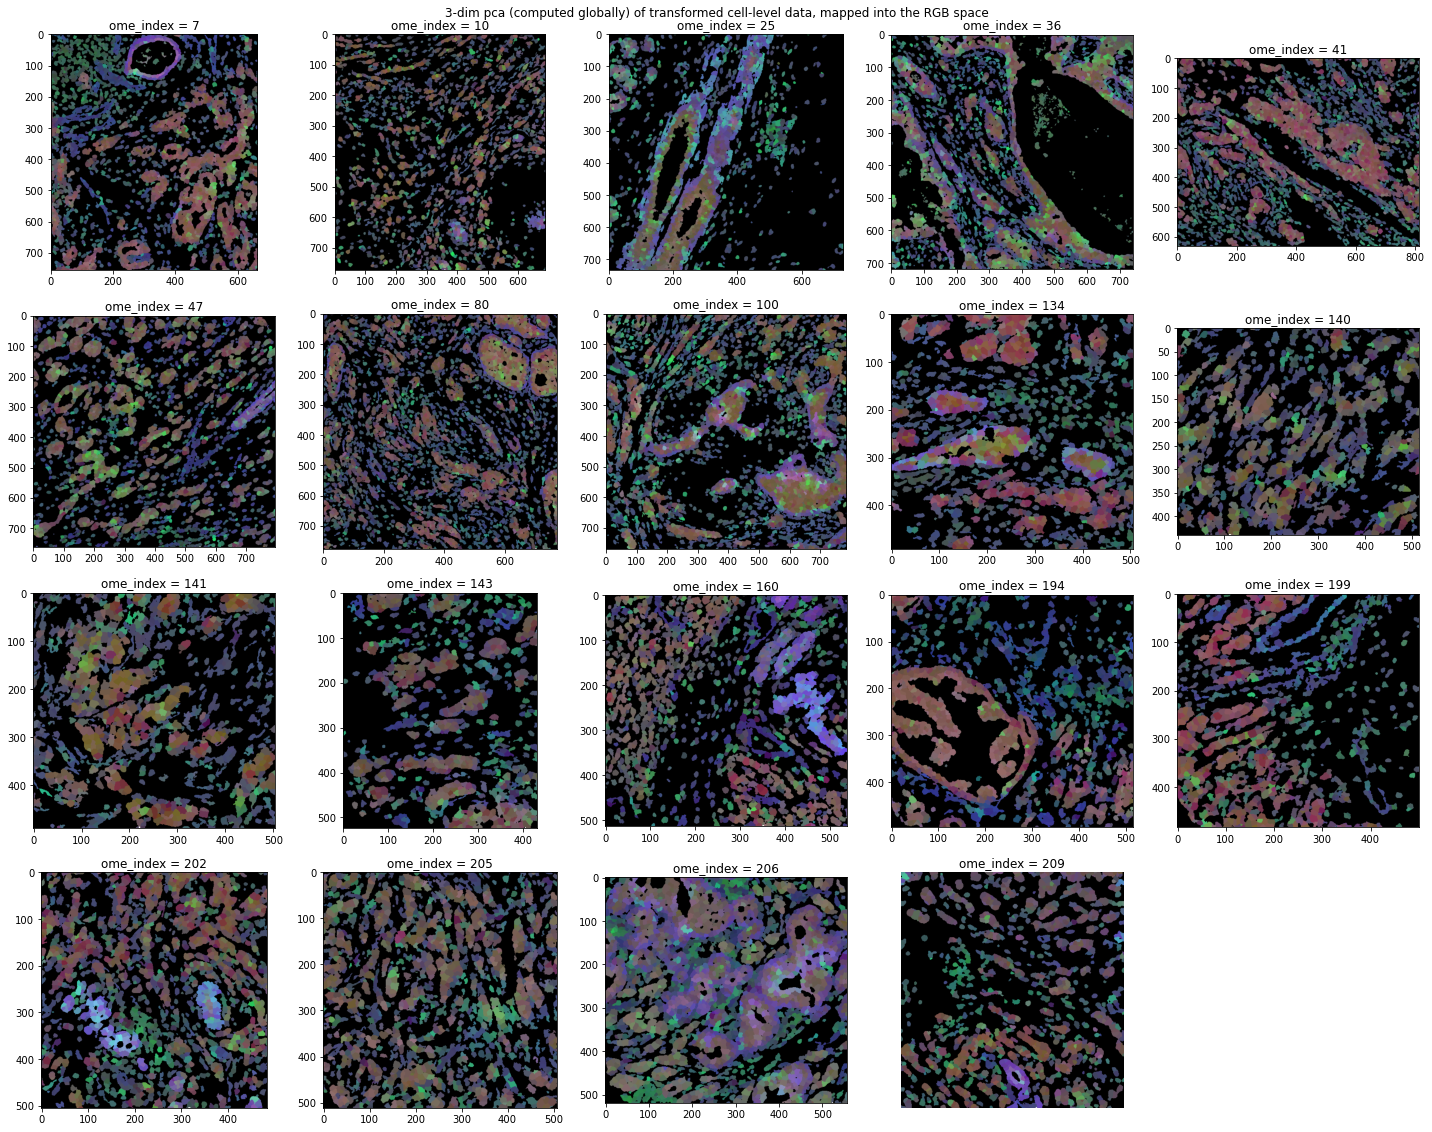

In [32]:
import math
masks_ds_train = MasksDataset('train')

# for method in methods:
method = 'vae_mu'
if True:
    for h in q.top[method][:1]:
        patients_per_hot_index = np.where(q.dbscan_labels[method] == h)[0]
        print(patients_per_hot_index)
        print('=' * 100)
        print(f'methods = {method}, hot_index = {h}')
        l = len(patients_per_hot_index)
        d = 4
        cols = 5
        rows = math.ceil(l / cols)
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * d, rows * d))
        axes = axes.flatten()
        for i, ome_index in enumerate(tqdm(patients_per_hot_index, desc='plotting omes')):
#             print(f'ome_index = {ome_index}')
            begin = index_info_begins[ome_index]
            end = index_info_ends[ome_index]

            ome_filename = masks_ds_train.filenames[ome_index]
            masks = masks_ds_train[ome_index]

            d = get_filtered_labels_mapping(ome_index, ome_filename, 'train')

            new_masks = np.ones((masks.shape[0], masks.shape[1], 4))
            omitted_labels = set(list(range(np.max(masks)))).difference([dd.item() for dd in d.values()]).difference({0})
            for l in omitted_labels:
                new_masks[masks == l, :] = (0., 0., 0., 1.)
            new_masks[masks == 0, :] = (0., 0., 0., 1.)
#             kk = np.array([k for k in d.keys()])
#             vv = np.array([v.item() for v in d.values()])
#             # not working, but I should use of this kind
#             new_masks[masks == vv, :3] = pca[method][begin: end][kk, :]
            for k, v in d.items():
                new_masks[masks == v.item(), :3] = pca[method][begin: end][k, :]
    
            axes[i].imshow(new_masks)
            axes[i].set_title(f'ome_index = {ome_index}')
        for j in range(i, rows * cols):
            axes[j].axis('off')
        plt.suptitle(f'3-dim pca (computed globally) of transformed cell-level data, mapped into the RGB space')
        plt.tight_layout()
        plt.show()

[  7  10  25  36  41  47  80 100 134 140 141 143 160 194 199 202 205 206
 209]
methods = vae_mu, hot_index = 6


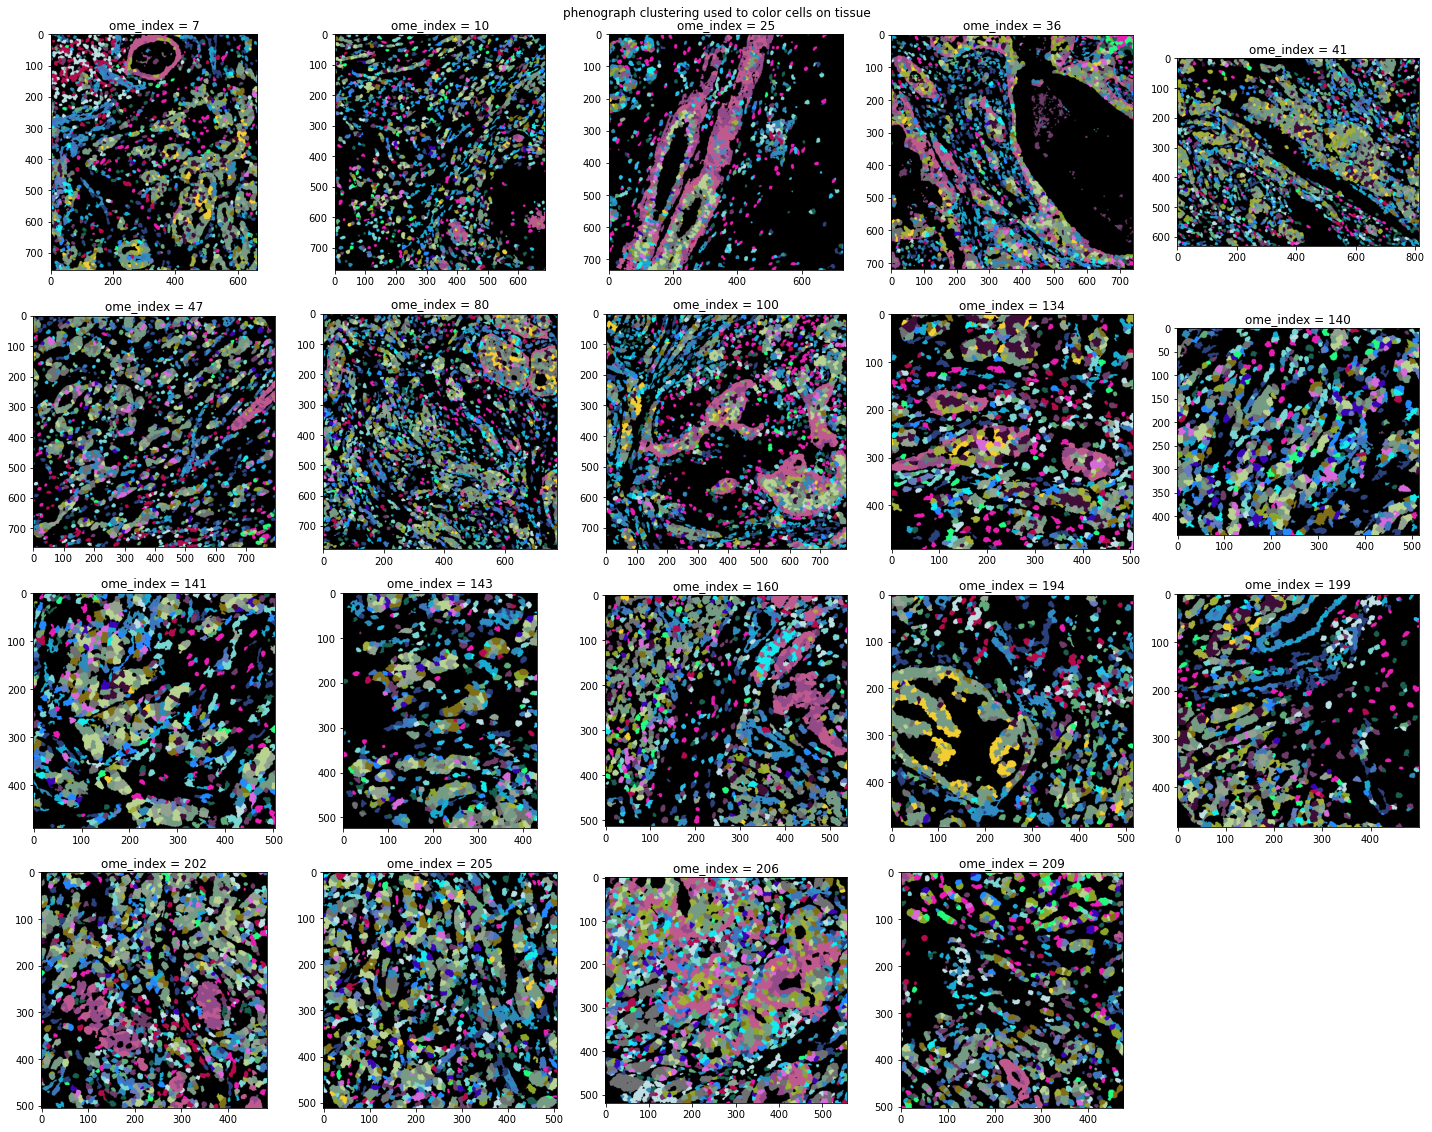

In [33]:
import math
masks_ds_train = MasksDataset('train')

# for method in methods:
if True:
    random_colors = np.random.rand(1000, 3)
    for h in q.top[method][:1]:
        patients_per_hot_index = np.where(q.dbscan_labels[method] == h)[0]
        print(patients_per_hot_index)
        print('=' * 100)
        print(f'methods = {method}, hot_index = {h}')
        l = len(patients_per_hot_index)
        d = 4
        cols = 5
        rows = math.ceil(l / cols)
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * d, rows * d))
        axes = axes.flatten()
        for i, ome_index in enumerate(tqdm(patients_per_hot_index, desc='plotting omes')):
#             print(f'ome_index = {ome_index}')
            begin = index_info_begins[ome_index]
            end = index_info_ends[ome_index]

            ome_filename = masks_ds_train.filenames[ome_index]
            masks = masks_ds_train[ome_index]

            d = get_filtered_labels_mapping(ome_index, ome_filename, 'train')

            new_masks = np.ones((masks.shape[0], masks.shape[1], 4))
            omitted_labels = set(list(range(np.max(masks)))).difference([dd.item() for dd in d.values()]).difference({0})
            for l in omitted_labels:
                new_masks[masks == l, :] = (0., 0., 0., 1.)
            new_masks[masks == 0, :] = (0., 0., 0., 1.)
#             kk = np.array([k for k in d.keys()])
#             vv = np.array([v.item() for v in d.values()])
#             # not working, but I should use of this kind
#             new_masks[masks == vv, :3] = pca[method][begin: end][kk, :]
            for k, v in d.items():
                new_masks[masks == v.item(), :3] = random_colors[q.phenographs[method][begin: end][k, :]]
    
            axes[i].imshow(new_masks)
            axes[i].set_title(f'ome_index = {ome_index}')
        for j in range(i + 1, rows * cols):
            axes[j].axis('off')
        plt.suptitle(f'phenograph clustering used to color cells on tissue')
        plt.tight_layout()
        plt.show()

[  7  10  25  36  41  47  80 100 134 140 141 143 160 194 199 202 205 206
 209]
methods = vae_mu, hot_index = 6


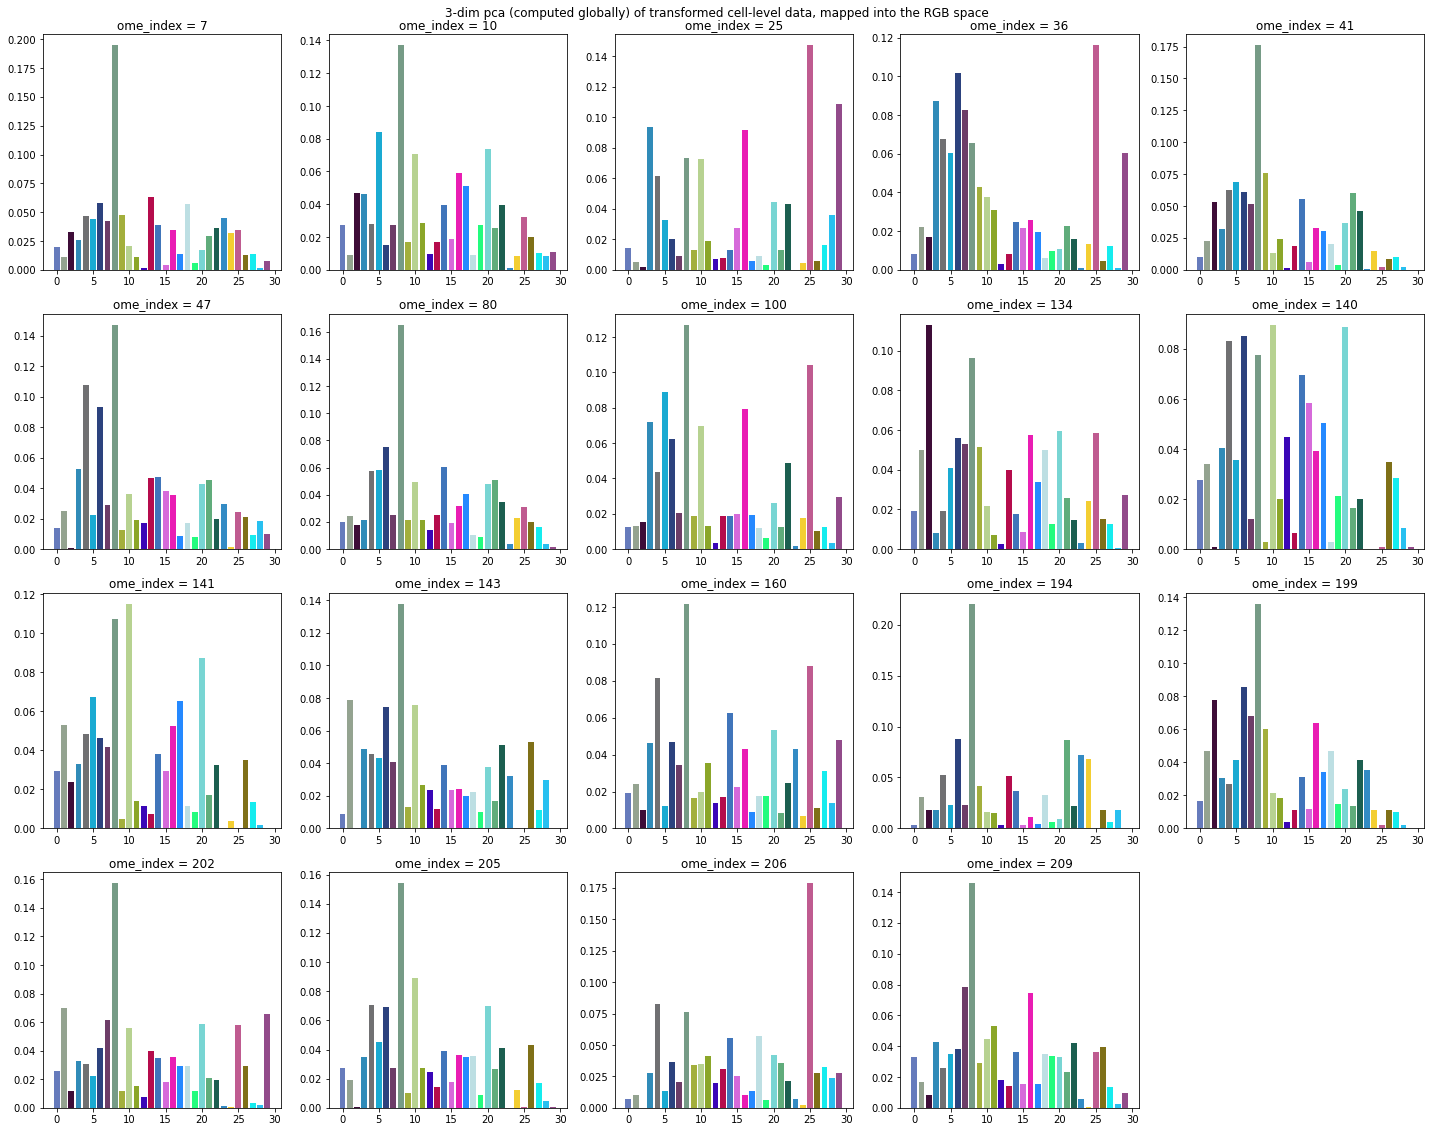

In [34]:
import math
masks_ds_train = MasksDataset('train')

# for method in methods:
if True:
    for h in q.top[method][:1]:
        patients_per_hot_index = np.where(q.dbscan_labels[method] == h)[0]
        print(patients_per_hot_index)
        print('=' * 100)
        print(f'methods = {method}, hot_index = {h}')
        l = len(patients_per_hot_index)
        d = 4
        cols = 5
        rows = math.ceil(l / cols)
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * d, rows * d))
        axes = axes.flatten()
        for i, ome_index in enumerate(tqdm(patients_per_hot_index, desc='plotting omes')):
            f = q.all_fractions[method][ome_index, :]
            axes[i].bar(np.arange(len(f)), f, color=[random_colors[j] for j in np.arange(len(f))])
            axes[i].set_title(f'ome_index = {ome_index}')
        for j in range(i + 1, rows * cols):
            axes[j].axis('off')
        plt.suptitle(f'3-dim pca (computed globally) of transformed cell-level data, mapped into the RGB space')
        plt.tight_layout()
        plt.show()

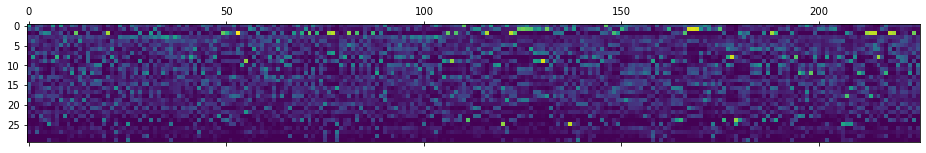

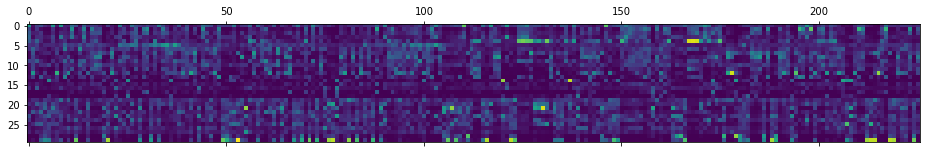

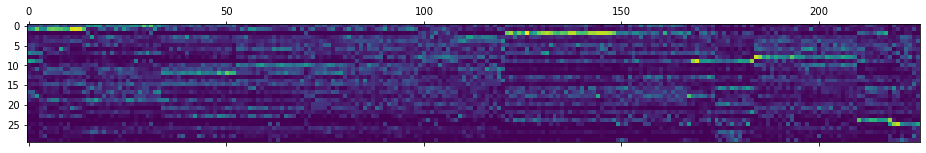

In [35]:
m = q.all_fractions[method].T
plt.matshow(m)
import scipy
import scipy.cluster.hierarchy as sch
# vector of pairwise distances
d = sch.distance.pdist(m)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
ind
ii, cc = zip(*sorted(zip(range(len(ind)), ind), key=lambda x: x[1]))
ii = np.array(ii)
plt.matshow(m[ii, :])

m = m.T
d = sch.distance.pdist(m)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
ind
ii, cc = zip(*sorted(zip(range(len(ind)), ind), key=lambda x: x[1]))
ii = np.array(ii)

plt.matshow(m[ii, :].T)

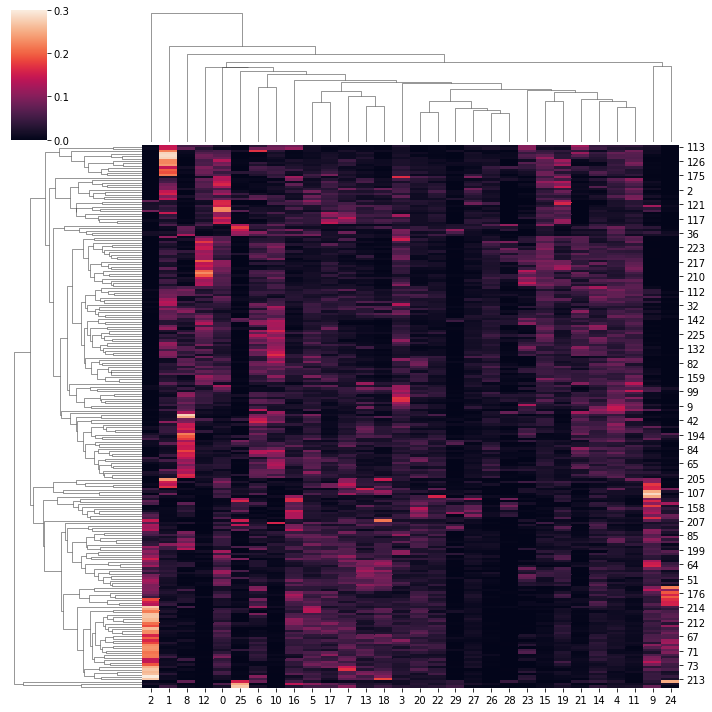

In [36]:
import seaborn as sns
df = pd.DataFrame(m)
a = sns.clustermap(df)

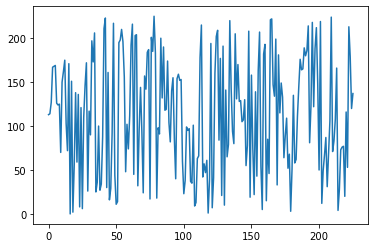

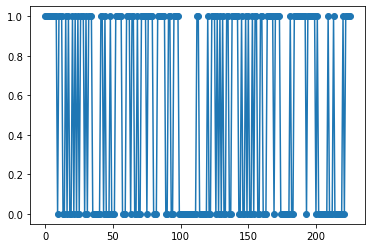

In [37]:
b = a.data2d.index.to_numpy()
i = np.arange(len(b))
plt.plot(i, b)
plt.show()
plt.plot(i, cohort_info[b[i]], '-o')
plt.show()

# UMAPs

vae_mu
(449434, 5)


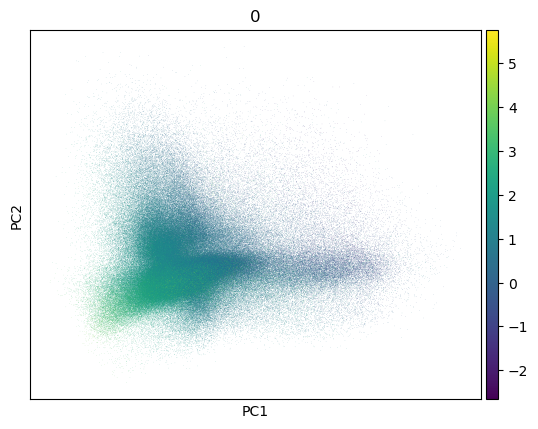

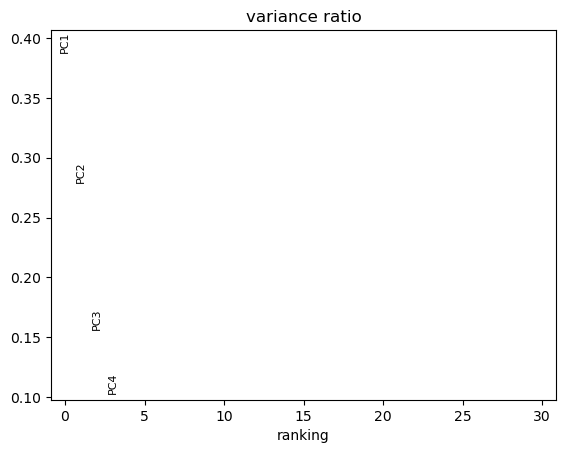

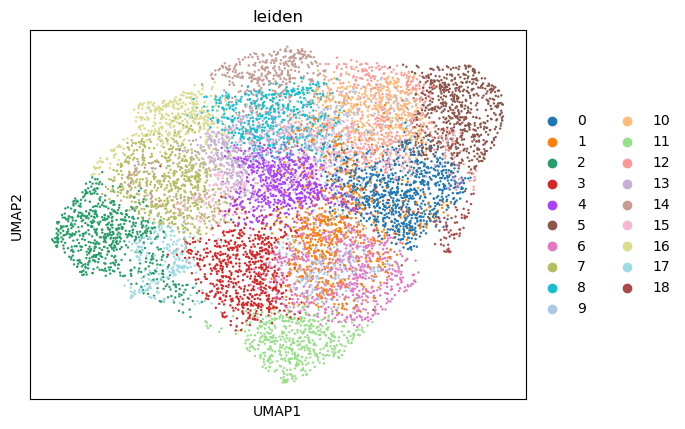

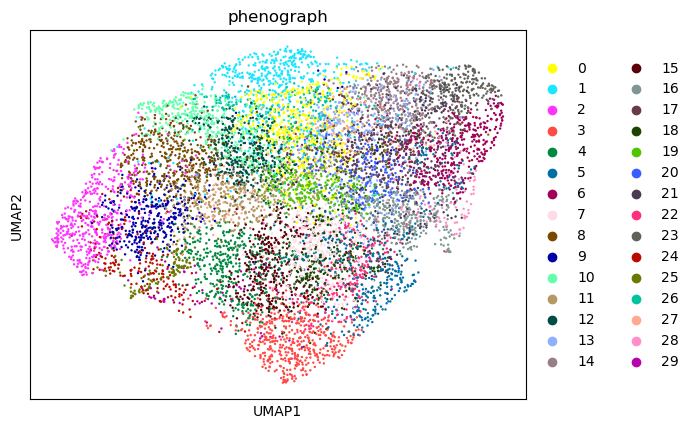

In [38]:
plt.style.use('default')
print(method)
print(expressions['vae_mu'].shape)
a = q.adata[method]
random_choice = np.random.choice(len(a), 10000, replace=False)

sc.tl.pca(a, svd_solver='arpack')
sc.pl.pca(a, color='0')
sc.pl.pca_variance_ratio(a)
# sc.pl.pca_variance_ratio(a0, log=True)
b = a[random_choice, :].copy()
sc.pp.neighbors(b)
sc.tl.leiden(b)
sc.tl.umap(b)
sc.pl.umap(b, color='leiden')
sc.pl.umap(b, color='phenograph')

[27, 245, 454, 651, 882, 1121, 1502, 1734, 1928, 2021, 2558, 2958, 2967, 3179, 3212, 3286, 3644, 3679, 3862, 3899, 3933, 3978, 3982, 4101, 4277, 4445, 4500, 4513, 4561, 4879, 5253, 5360, 5527, 5862, 5902, 6139, 6395, 6723, 7113, 7284, 7326, 7808, 7835, 8062, 8084, 8103, 8145, 8289, 8430, 8508, 9134, 9236, 9802]


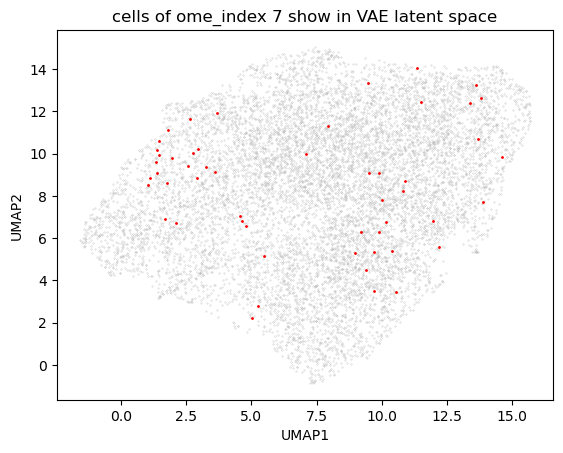

In [39]:
import matplotlib

index_info_omes, index_info_begins, index_info_ends = pickle.load(open(file_path('merged_cells_info.pickle'), 'rb'))
ome_index = 7
begin = index_info_begins[ome_index]
end = index_info_ends[ome_index]
random_in_ome = [j for j, i in enumerate(random_choice) if begin <= i < end]
print(random_in_ome)
z = np.zeros(len(random_choice))
z[random_in_ome] = 1
s = pd.Series(z, dtype='category')
s.index = b.obs.index
b.obs[f'ome_index{ome_index}'] = s
u = b.obsm['X_umap']
# plt.style.use('dark_background')
plt.figure()
plt.scatter(u[:, 0], u[:, 1], s=0.05, color=(0.7, 0.7, 0.7))
plt.scatter(u[random_in_ome, 0], u[random_in_ome, 1], s=1, c='r')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title(f'cells of ome_index {ome_index} show in VAE latent space')
plt.show()
plt.style.use('default')

In [122]:
class Coord:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __str__(self):
        return f'({self.x:0.1f}, {self.y:0.1f})'
class Rectangle:
    def __init__(self, ll):
        eps = 0.001
        self.bottom_left = Coord(ll[0] - eps, ll[1] - eps)
        self.bottom_right = Coord(ll[0] + ll[2] + eps, ll[1] - eps)
        self.top_left = Coord(ll[0] - eps, ll[1] + ll[3] + eps)
        self.top_right = Coord(ll[0] + ll[2] + eps, ll[1] + ll[3] + eps)
    def __str__(self):
        return f'[{self.bottom_left}, {self.bottom_right}, {self.top_left}, {self.top_right}]'
    
def overlaps(ll, rects):
    a = Rectangle(ll)
    o = False
    for r in rects:
        b = Rectangle(r)
#                 aprint(a, b)
        o = o or not (a.top_right.x < b.bottom_left.x or a.bottom_left.x > b.top_right.x or a.top_right.y < b.bottom_left.y or a.bottom_left.y > b.top_right.y)
    return o

(12.17333197593689, 13.053420305252075) (13.637507963180543, 16.012254190444946)
ll [0.3820303774383303, 0.7188303677451916, 0.09, 0.09]
ll [0.3820303774383303, 0.7188303677451916, 0.09, 0.09]
ll [0.20540099710714715, 0.14482585298801604, 0.09, 0.09]
ll [0.20540099710714715, 0.14482585298801604, 0.09, 0.09]
ll [0.5280160657554159, 0.03271138359492859, 0.09, 0.09]
ll [0.5280160657554159, 0.03271138359492859, 0.09, 0.09]
ll [0.40627300045716186, 0.07439802582681618, 0.09, 0.09]
ll [0.40627300045716186, 0.07439802582681618, 0.09, 0.09]
ll [0.5719082464825173, 0.7151860226801974, 0.09, 0.09]
ll [0.5719082464825173, 0.7151860226801974, 0.09, 0.09]
ll [0.9088024096213683, 0.8400782214939776, 0.09, 0.09]
ll [0.9088024096213683, 0.8400782214939776, 0.09, 0.09]
ll [0.7656396472801236, 0.6726807093949824, 0.09, 0.09]
ll [0.7656396472801236, 0.6726807093949824, 0.09, 0.09]
ll [0.4579524529542768, 0.18915809277463452, 0.09, 0.09]
ll [0.4579524529542768, 0.18915809277463452, 0.09, 0.09]
ll [0.31366

RuntimeError: Can't avoid the overlap. Blaim the coder not the problem!

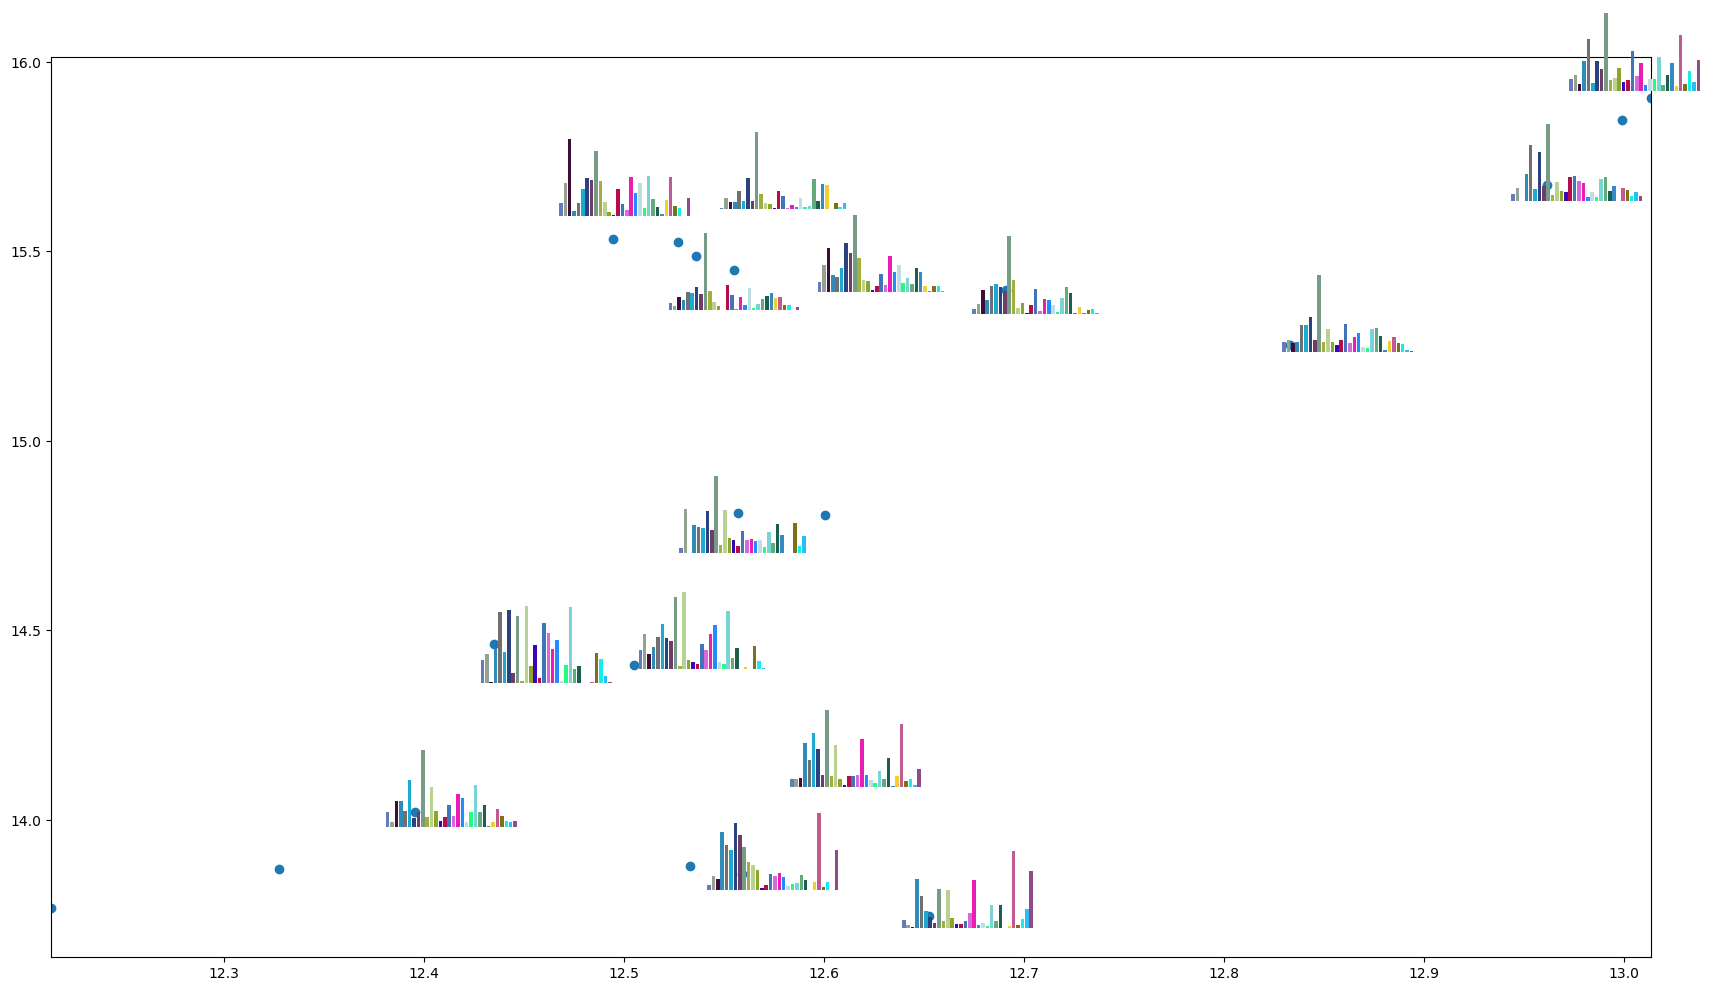

In [179]:
import math
masks_ds_train = MasksDataset('train')

# for method in methods:
if True:
    for h in q.top[method][:1]:
        patients_per_hot_index = np.where(q.dbscan_labels[method] == h)[0]
#         print(patients_per_hot_index)
        u = q.fractions_u[method]
        u_hot = u[patients_per_hot_index, :]
        u_hot_sorted_combined = sorted(enumerate(u_hot), key=lambda x: x[1][1])
        u_order = list(zip(*u_hot_sorted_combined))[0]
        u_hot_sorted = list(zip(*u_hot_sorted_combined))[1]
        patients_per_hot_index_sorted = []
        for uu in u_hot_sorted:
            aa = np.where(u == uu)
            assert len(aa) == 2
            assert (aa[1] == np.array([0, 1])).all()
            assert aa[0][0] == aa[0][1]
            n = aa[0][0]
            patients_per_hot_index_sorted.append(n)
#         print(patients_per_hot_index_sorted)
        assert set(patients_per_hot_index_sorted) == set(patients_per_hot_index)
#         print(u_hot[u_order, :])
#         print(u_order)
#         aasda
#         print('=' * 100)
#         print(f'methods = {method}, hot_index = {h}')
        l = len(patients_per_hot_index)
        d = 4
        cols = 5
        rows = math.ceil(l / cols)

#         plt.figure()
#         plt.scatter(u[:, 0], u[:, 1], s=1)
#         plt.scatter(u_hot[:, 0], u_hot[:, 1], c='r', s=1)
#         plt.show()
        
#         plt.figure()
# #         print(u_hot_sorted)
#         plt.scatter(u_hot[:, 0], u_hot[:, 1]) #, c=[u_order.index(i) for i in range(len(u_order))])
#         plt.show()
        
#         fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * d, rows * d))
#         axes = axes.flatten()
#         for i, ome_index in enumerate(tqdm(patients_per_hot_index_sorted, desc='plotting omes')):
#             f = q.all_fractions[method][ome_index, :]
#             axes[i].bar(np.arange(len(f)), f, color=[random_colors[j] for j in np.arange(len(f))])
#             axes[i].set_title(f'ome_index = {ome_index}')
#         for j in range(i + 1, rows * cols):
#             axes[j].axis('off')
#         plt.suptitle(f'3-dim pca (computed globally) of transformed cell-level data, mapped into the RGB space')
#         plt.tight_layout()
#         plt.show()
        
        # --------------- tiny histograms 
        
        fig = plt.figure(figsize=(16, 9))
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(u_hot[:, 0], u_hot[:, 1])
        l = 0.045
#         ax = plt.gca()
        ax.margins(x=0)
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
#         ax.axis('off')
        print(xlim, ylim)
        def ff(pos, lim):
            relative = (pos - lim[0]) / (lim[1] - lim[0])
            assert 0 <= relative <= 1, relative
#             print(relative)
            return relative

        added_rectangles = []
        lines = []

        def jitter():
            return np.random.rand() * l
        
        def within_figure(ll):
            for lll in ll:
                if not (0 <= lll <= 1):
                    return False
            return True
        
        failed = 0
        
        def get_ll(i):
            if len(added_rectangles) == 0:
                ll = [ff(u_hot[i, 0], x_lim) - l, ff(u_hot[i, 1], y_lim) - l, 2 * l, 2 * l]
            else:
                current_jitter = 1
                while True:
                    ok = False
                    for jjj in range(current_jitter * 10000):
                        k = 1
                        ll = [ff(u_hot[i, 0], x_lim) - l + k * current_jitter * jitter(), ff(u_hot[i, 1], y_lim) - l + k * current_jitter * jitter(), 2 * l, 2 * l]
                        if not overlaps(ll, added_rectangles) and within_figure(ll):
                            ok = True
                            original = [ff(u_hot[i, 0], x_lim) - l, ff(u_hot[i, 1], y_lim) - l, 2 * l, 2 * l]
                            current = ll
                            original_x = (original[0] + original[2]) / 2
                            original_y = (original[1] + original[3]) / 2
                            current_x = (current[0] + current[2]) / 2
                            current_y = (current[1] + current[3]) / 2
                            lines.append([original_x, original_y, current_x, current_y])
                            break
                        else:
                            global failed
                            failed += 1
                            if failed >= 100000:
                                raise RuntimeError('Can\'t avoid the overlap. Blaim the coder not the problem!')
                    else:
                        current_jitter += 1
                    if current_jitter >= 10:
                        raise RuntimeError('Current jitter is too high')
                    if ok:
                        break
            added_rectangles.append(ll)
            print('ll', ll)
            return ll
        
        for i in range(len(u_hot)):
            ll = get_ll(i)
            print('ll', ll)
            ax = fig.add_axes(ll, anchor='C', zorder=100)
#             ax.imshow(np.zeros((5, 5)))
            ome_index = patients_per_hot_index[i]
            f = q.all_fractions[method][ome_index, :]
            ax.bar(np.arange(len(f)), f, color=[random_colors[j] for j in np.arange(len(f))])
            ax.axis('off')
        print(lines)
        plt.show()

(12.17333197593689, 13.053420305252075) (13.637507963180543, 16.012254190444946)
ll [0.39703037743833025, 0.7338303677451916, 0.06, 0.06]
ll [0.39703037743833025, 0.7338303677451916, 0.06, 0.06]
(755, 663, 4)
ll [0.22387759780625932, 0.1522664377729196, 0.06, 0.06]
ll [0.22387759780625932, 0.1522664377729196, 0.06, 0.06]
(772, 689, 4)
ll [0.5213347486181561, 0.017968496486226844, 0.06, 0.06]
ll [0.5213347486181561, 0.017968496486226844, 0.06, 0.06]
(733, 730, 4)
ll [0.41900332819108654, 0.08481928029140919, 0.06, 0.06]
ll [0.41900332819108654, 0.08481928029140919, 0.06, 0.06]
(720, 740, 4)
ll [0.5754967880616054, 0.7363165132907655, 0.06, 0.06]
ll [0.5754967880616054, 0.7363165132907655, 0.06, 0.06]
(631, 811, 4)
ll [0.9148720786274773, 0.8454726355343337, 0.06, 0.06]
ll [0.9148720786274773, 0.8454726355343337, 0.06, 0.06]
(762, 795, 4)
ll [0.7650090388357328, 0.650655404643559, 0.06, 0.06]
ll [0.7650090388357328, 0.650655404643559, 0.06, 0.06]
(777, 771, 4)
ll [0.45912275386343826, 0.

RuntimeError: Can't avoid the overlap. Blaim the coder not the problem!

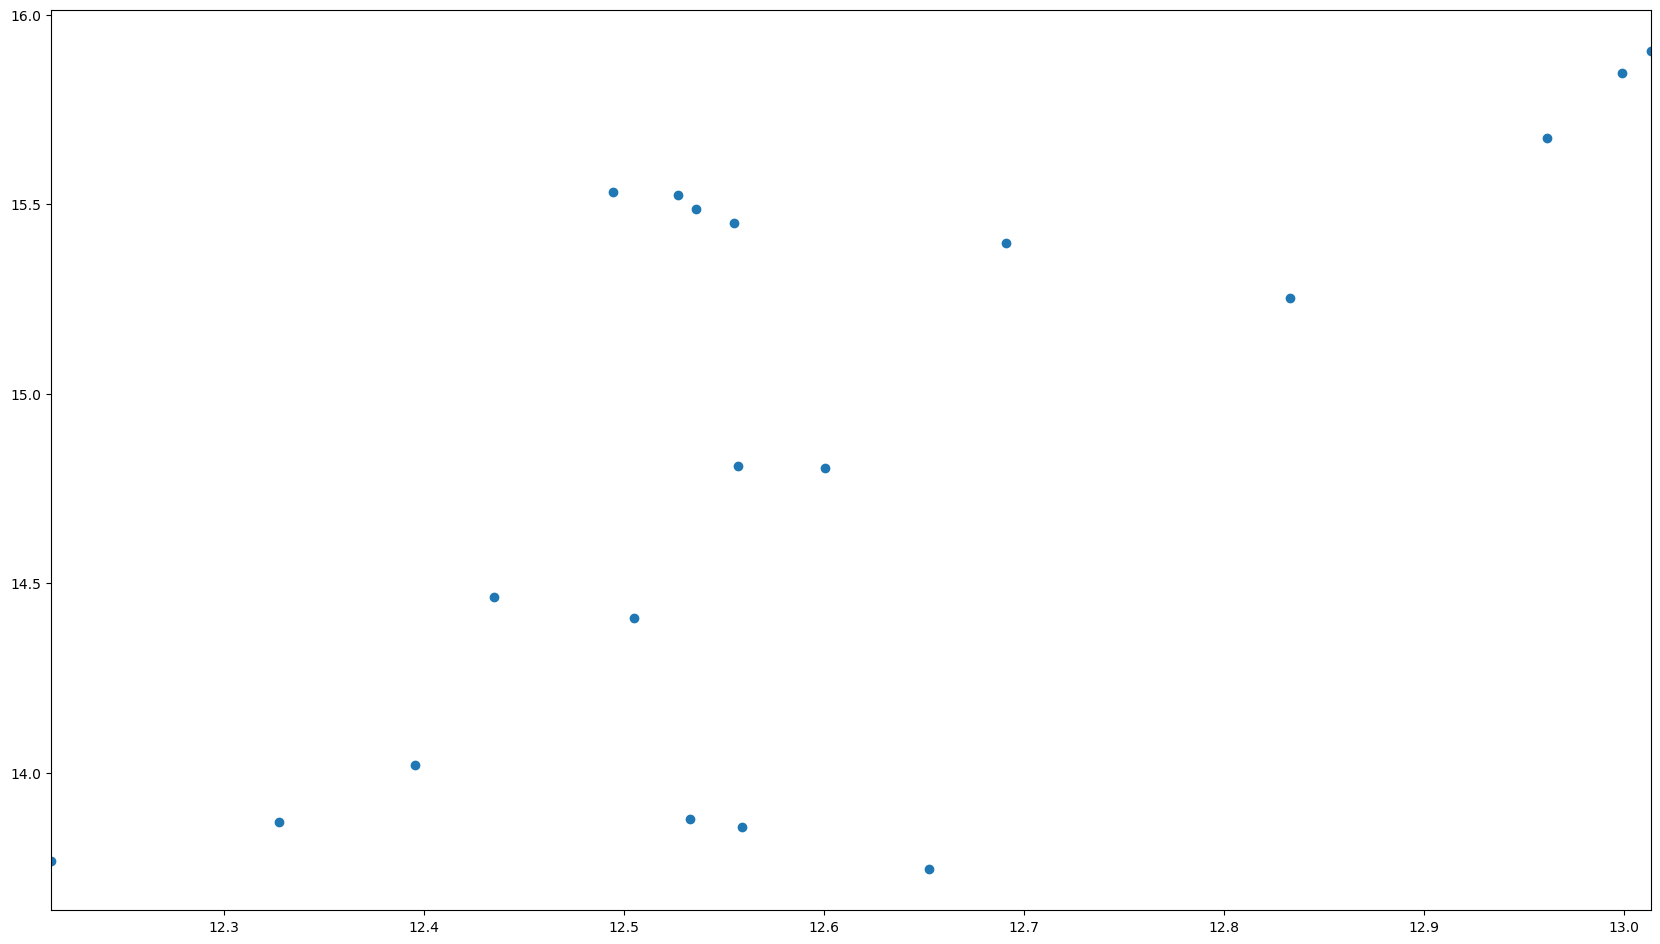

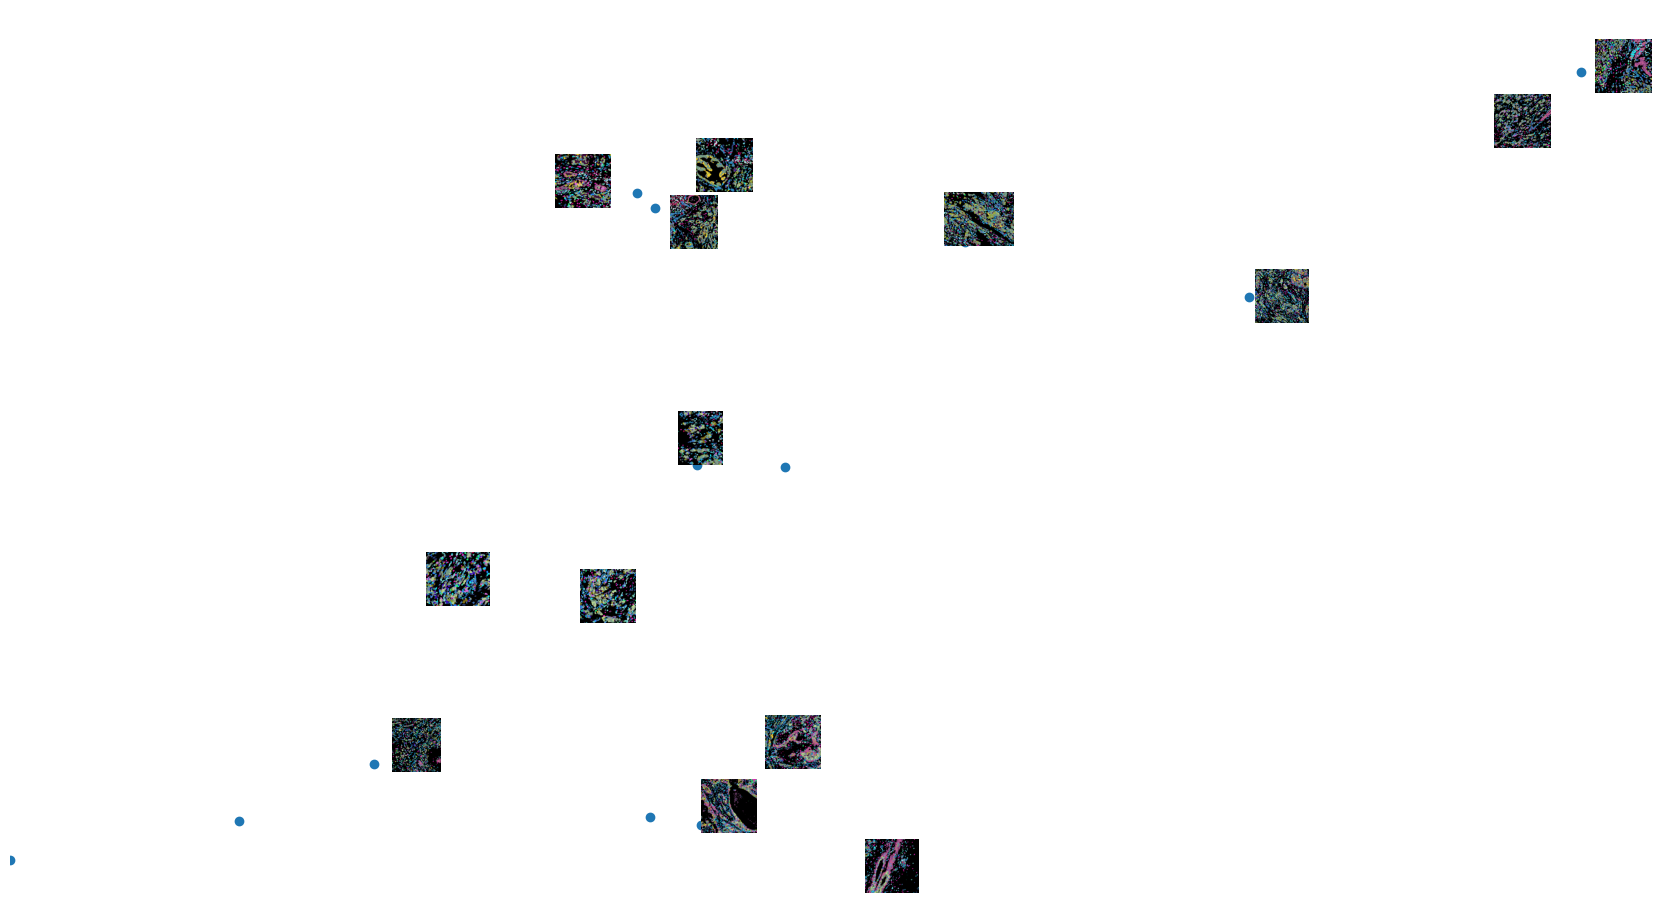

In [180]:
import math
masks_ds_train = MasksDataset('train')

# for method in methods:
if True:
    for h in q.top[method][:1]:
        patients_per_hot_index = np.where(q.dbscan_labels[method] == h)[0]
#         print(patients_per_hot_index)
        u = q.fractions_u[method]
        u_hot = u[patients_per_hot_index, :]
        u_hot_sorted_combined = sorted(enumerate(u_hot), key=lambda x: x[1][1])
        u_order = list(zip(*u_hot_sorted_combined))[0]
        u_hot_sorted = list(zip(*u_hot_sorted_combined))[1]
        patients_per_hot_index_sorted = []
        for uu in u_hot_sorted:
            aa = np.where(u == uu)
            assert len(aa) == 2
            assert (aa[1] == np.array([0, 1])).all()
            assert aa[0][0] == aa[0][1]
            n = aa[0][0]
            patients_per_hot_index_sorted.append(n)
#         print(patients_per_hot_index_sorted)
        assert set(patients_per_hot_index_sorted) == set(patients_per_hot_index)
#         print(u_hot[u_order, :])
#         print(u_order)
#         aasda
#         print('=' * 100)
#         print(f'methods = {method}, hot_index = {h}')
        l = len(patients_per_hot_index)
        d = 4
        cols = 5
        rows = math.ceil(l / cols)

#         plt.figure()
#         plt.scatter(u[:, 0], u[:, 1], s=1)
#         plt.scatter(u_hot[:, 0], u_hot[:, 1], c='r', s=1)
#         plt.show()
        
#         plt.figure()
# #         print(u_hot_sorted)
#         plt.scatter(u_hot[:, 0], u_hot[:, 1]) #, c=[u_order.index(i) for i in range(len(u_order))])
#         plt.show()
        
#         fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * d, rows * d))
#         axes = axes.flatten()
#         for i, ome_index in enumerate(tqdm(patients_per_hot_index_sorted, desc='plotting omes')):
#             f = q.all_fractions[method][ome_index, :]
#             axes[i].bar(np.arange(len(f)), f, color=[random_colors[j] for j in np.arange(len(f))])
#             axes[i].set_title(f'ome_index = {ome_index}')
#         for j in range(i + 1, rows * cols):
#             axes[j].axis('off')
#         plt.suptitle(f'3-dim pca (computed globally) of transformed cell-level data, mapped into the RGB space')
#         plt.tight_layout()
#         plt.show()
        
        # --------------- tiny histograms 
        
        fig = plt.figure(figsize=(16, 9))
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(u_hot[:, 0], u_hot[:, 1])
        l = 0.045
#         ax = plt.gca()
        ax.margins(x=0)
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
#         ax.axis('off')
        print(xlim, ylim)
        def ff(pos, lim):
            relative = (pos - lim[0]) / (lim[1] - lim[0])
            assert 0 <= relative <= 1, relative
#             print(relative)
            return relative

        added_rectangles = []
        lines = []

        def jitter():
            return np.random.rand() * l
        
        def within_figure(ll):
            for lll in ll:
                if not (0 <= lll <= 1):
                    return False
            return True
        
        failed = 0
        
        def get_ll(i):
            if len(added_rectangles) == 0:
                ll = [ff(u_hot[i, 0], x_lim) - l, ff(u_hot[i, 1], y_lim) - l, 2 * l, 2 * l]
            else:
                current_jitter = 1
                while True:
                    ok = False
                    for jjj in range(current_jitter * 10000):
                        k = 1
                        ll = [ff(u_hot[i, 0], x_lim) - l + k * current_jitter * jitter(), ff(u_hot[i, 1], y_lim) - l + k * current_jitter * jitter(), 2 * l, 2 * l]
                        if not overlaps(ll, added_rectangles) and within_figure(ll):
                            ok = True
                            original = [ff(u_hot[i, 0], x_lim) - l, ff(u_hot[i, 1], y_lim) - l, 2 * l, 2 * l]
                            current = ll
                            original_x = (original[0] + original[2]) / 2
                            original_y = (original[1] + original[3]) / 2
                            current_x = (current[0] + current[2]) / 2
                            current_y = (current[1] + current[3]) / 2
                            lines.append([original_x, original_y, current_x, current_y])
                            break
                        else:
                            global failed
                            failed += 1
                            if failed >= 100000:
                                raise RuntimeError('Can\'t avoid the overlap. Blaim the coder not the problem!')
                    else:
                        current_jitter += 1
                    if current_jitter >= 10:
                        raise RuntimeError('Current jitter is too high')
                    if ok:
                        break
            added_rectangles.append(ll)
            print('ll', ll)
            return ll
        
#         ---------------- tiny images
        
        fig = plt.figure(figsize=(16, 9))
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(u_hot[:, 0], u_hot[:, 1])
        l = 0.03
#         ax = plt.gca()
        ax.margins(x=0)
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
        ax.axis('off')
#         print(xlim, ylim)
 
#         for i in [0, 1]: #range(len(u_hot)):
#             ll = [ff(u_hot[i, 0], x_lim) - l + jitter(), ff(u_hot[i, 1], y_lim) - l + jitter(), 2 * l, 2 * l]
#             print(ll)
            
        for i in range(len(u_hot)):
            ll = get_ll(i)
            print('ll', ll)
            ax = fig.add_axes(ll, anchor='C', zorder=100)
#             ax.imshow(np.zeros((5, 5)))
            ome_index = patients_per_hot_index[i]
            begin = index_info_begins[ome_index]
            end = index_info_ends[ome_index]

            ome_filename = masks_ds_train.filenames[ome_index]
            masks = masks_ds_train[ome_index]

            d = get_filtered_labels_mapping(ome_index, ome_filename, 'train')

            new_masks = np.ones((masks.shape[0], masks.shape[1], 4))
            omitted_labels = set(list(range(np.max(masks)))).difference([dd.item() for dd in d.values()]).difference({0})
            for ll in omitted_labels:
                new_masks[masks == ll, :] = (0., 0., 0., 1.)
            new_masks[masks == 0, :] = (0., 0., 0., 1.)
#             kk = np.array([k for k in d.keys()])
#             vv = np.array([v.item() for v in d.values()])
#             # not working, but I should use of this kind
#             new_masks[masks == vv, :3] = pca[method][begin: end][kk, :]
            for k, v in d.items():
                new_masks[masks == v.item(), :3] = random_colors[q.phenographs[method][begin: end][k, :]]
            print(new_masks.shape)
            ax.imshow(new_masks)
            ax.axis('off')
        plt.show()

In [142]:
overlaps([0, 0, 0.2, 0.2], [[0.55, 0.55, 0.1, 0.1], [0.0, 0.3, 0.1, 0.1]])

False